
# 게임 데이터 

다음 분기에 어떤 게임을 설계를 해야할지 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = 'retina'
set_matplotlib_formats("retina")

plt.rcParams["patch.force_edgecolor"] = True
sns.set_palette('deep')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [3]:
df = pd.read_csv('vgames2.csv', index_col = 0 )
df[df['Year'] < 100]

Name Platform  Year     Genre  \
75          Age of Empires III: Complete Collection       PC   9.0  Strategy   
82                            Treasures of the Deep       PS  97.0    Action   
214                                NASCAR Unleashed      PS3  11.0    Racing   
305    Kung Fu Panda: Showdown of Legendary Legends      PS3  15.0    Action   
769                             NASCAR Thunder 2004      PS2   3.0    Racing   
...                                             ...      ...   ...       ...   
15986                                Sugoi Hebereke     SNES  94.0  Fighting   
16104                                  Fab 5 Soccer       DS   8.0    Sports   
16150                    Dragon Ball Z: Burst Limit     X360   8.0  Fighting   
16395                                 Point Blank 3       PS   0.0   Shooter   
16483              Super Robot Taisen F Kanketsuhen      SAT  98.0  Strategy   

                    Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
75     Microsoft Game Studios     0.01     0.12        0        0.03  
82         Namco Bandai Games      0.1     0.07        0        0.01  
214                Activision     0.09        0        0        0.01  
305              Little Orbit        0     0.02        0           0  
769           Electronic Arts     0.53     0.41        0        0.14  
...                       ...      ...      ...      ...         ...  
15986                 Sunsoft        0        0     0.02           0  
16104               Destineer     0.01        0        0           0  
16150                   Atari     0.24     0.18     0.03        0.05  
16395      Namco Bandai Games     0.01     0.01        0           0  
16483               Banpresto       0M        0     0.55           0  

[100 rows x 9 columns]

# 데이터 전처리
- Sales 의 단위를 맞춰준다. 데이터를 확인해보니 M, K 단위가 적혀 있는 것이 있다. M(million) 단위로 맞춰주고 문자열 삭제후 float 형식으로 바꿔준다. 

- Year이 1의자리와 10의 자리로 표시한것을 1000의 자리로 바꿔 준다.

- Sales 의 결측치는 안팔린것으로 생각하고 0으로 둔다. 나머지 결측치들은 지우준다.

In [4]:
df_game = df.copy()
df_game

Name Platform    Year  \
1                        Candace Kane's Candy Factory       DS  2008.0   
2                                      The Munchables      Wii  2009.0   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
4                    Deal or No Deal: Special Edition       DS  2010.0   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16594                         Ice Age 2: The Meltdown       GC  2006.0   
16595                     Rainbow Islands: Revolution      PSP  2005.0   
16596                                        NBA 2K16      PS3  2015.0   
16597                     Toukiden: The Age of Demons      PSV  2013.0   
16598                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
1         Action                    Destineer     0.04        0        0   
2         Action           Namco Bandai Games     0.17        0        0   
3      Adventure                    Alchemist        0        0     0.02   
4           Misc                    Zoo Games     0.04        0        0   
5       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16594   Platform                Vivendi Games     0.15     0.04        0   
16595     Action            Rising Star Games     0.01        0        0   
16596     Sports         Take-Two Interactive     0.44     0.19     0.03   
16597     Action                   Tecmo Koei     0.05     0.05     0.25   
16598   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
1               0  
2            0.01  
3               0  
4               0  
5            0.04  
...           ...  
16594        0.01  
16595           0  
16596        0.13  
16597        0.03  
16598        0.01  

[16598 rows x 9 columns]

In [5]:
# M이 포함 되어 있는 컬럼 확인

df_game[df_game.iloc[:,-3].str.contains('M') == True]

Name Platform    Year     Genre  \
11                   Ford Racing       PS  2001.0    Racing   
37     Advance Wars: Dual Strike       DS  2005.0  Strategy   
177                    Max Payne      GBA  2003.0   Shooter   
218                   MotoGP '06     X360  2006.0    Racing   
461        Spider-Man: The Movie       GC  2002.0    Action   
...                          ...      ...     ...       ...   
16166           My Spanish Coach       DS  2007.0      Misc   
16269        Shellshock: Nam '67       XB  2004.0   Shooter   
16348        Aladdin Magic Racer      Wii  2011.0    Racing   
16385    Tomb Raider: Underworld      PS2  2009.0    Action   
16572               Koihime Enbu      PS4  2016.0  Fighting   

                  Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
11       Empire Interactive     480K    0.33M       0K        0.06  
37                 Nintendo      0.3    0.03M     0.04        0.03  
177    Take-Two Interactive     0.02    0.01M        0           0  
218                     THQ     0.11    0.01M        0        0.01  
461              Activision     0.86    0.27M     0.01        0.04  
...                     ...      ...      ...      ...         ...  
16166               Ubisoft      0.4    0.01M        0        0.03  
16269     Eidos Interactive     0.16    0.05M        0        0.01  
16348   Big Ben Interactive     0.01       0M        0           0  
16385     Eidos Interactive     0.09    0.04M        0        0.05  
16572                  Yeti        0       0M     0.02           0  

[100 rows x 9 columns]

In [6]:
# for 문으로 뒤에서 -5 전 까지 M 이 포함 되어 있는 것을 지웠다. 

for i in range(1,5):
  df_game.iloc[:,-i].replace('M', '', regex =True, inplace = True)

In [7]:
#K 가가 포함 되어 있는 인덱스 값은 저장 
NA_index = df_game[df_game['NA_Sales'].str.contains('K')== True].index
EU_index = df_game[df_game['EU_Sales'].str.contains('K')== True].index
JP_index = df_game[df_game['JP_Sales'].str.contains('K')== True].index
OT_index = df_game[df_game['Other_Sales'].str.contains('K')== True].index

In [8]:
# for 문으로 뒤에서 -5 전 까지 K 이 포함 되어 있는 것을 지웠다. 

for i in range(1,5):
  df_game.iloc[:,-i].replace('K', '', regex =True, inplace = True)

In [9]:
#계산을 하기 위해서 to_numeric 으로 실수형으로 바꿔준다.

for i in range(1,5):
  df_game.iloc[:,-i] = pd.to_numeric(df_game.iloc[:,-i], errors='coerce')

In [10]:
# 각인덱스를 불러와서 1000으로 나누어 단위를 m 으로 맞춰준다.
df_game['NA_Sales'].loc[NA_index] = df_game['NA_Sales'].loc[NA_index]/1000
df_game['EU_Sales'].loc[EU_index] = df_game['EU_Sales'].loc[NA_index]/1000
df_game['JP_Sales'].loc[JP_index] = df_game['JP_Sales'].loc[NA_index]/1000
df_game['Other_Sales'].loc[OT_index] = df_game['Other_Sales'].loc[NA_index]/1000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
df_game

Name Platform    Year  \
1                        Candace Kane's Candy Factory       DS  2008.0   
2                                      The Munchables      Wii  2009.0   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
4                    Deal or No Deal: Special Edition       DS  2010.0   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16594                         Ice Age 2: The Meltdown       GC  2006.0   
16595                     Rainbow Islands: Revolution      PSP  2005.0   
16596                                        NBA 2K16      PS3  2015.0   
16597                     Toukiden: The Age of Demons      PSV  2013.0   
16598                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
1         Action                    Destineer      0.04      0.00      0.00   
2         Action           Namco Bandai Games      0.17      0.00      0.00   
3      Adventure                    Alchemist      0.00      0.00      0.02   
4           Misc                    Zoo Games      0.04      0.00      0.00   
5       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16594   Platform                Vivendi Games      0.15      0.04      0.00   
16595     Action            Rising Star Games      0.01      0.00      0.00   
16596     Sports         Take-Two Interactive      0.44      0.19      0.03   
16597     Action                   Tecmo Koei      0.05      0.05      0.25   
16598   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  
1             0.00  
2             0.01  
3             0.00  
4             0.00  
5             0.04  
...            ...  
16594         0.01  
16595         0.00  
16596         0.13  
16597         0.03  
16598         0.01  

[16598 rows x 9 columns]

In [12]:
#Year 2자리 숫자 인것을 확인해보고 50보다 큰수는  몇개씩 검색을 통해 앞에 19 를 뺀 데이터들이였고

year_two_index_19 = df_game[(df_game['Year'] <100 )& (df_game['Year'] >= 80)].index
print(year_two_index_19, '\n')

#Year 2자리 숫자 인것을 확인해보고 작은수는   검색을 통해 앞에 20 를 뺀 데이터들인것을 확인 

year_two_index_20 = df_game[(df_game['Year'] <80 )& (df_game['Year'] >= 10)].index
print(year_two_index_20, '\n')

#Year 이 1자리 인것은 2000년 대 상품 인것을 확인 했다. 

year_one_index =  df_game[(df_game['Year'] <10 )& (df_game['Year'] >=  0)].index
print(year_one_index, '\n')

Int64Index([   82,   907,  2430,  3493,  4366,  4808,  4840, 10316, 10706,
            11335, 14573, 14786, 15986, 16483],
           dtype='int64') 

Int64Index([  214,   305,  3021,  3045,  4011,  4320,  4728,  5194,  5947,
             6114,  6160,  6193,  6900,  7185,  7556,  7628,  8192,  8551,
             8840,  9292, 10406, 10622, 10812, 10923, 11264, 11520, 11961,
            12383, 12870, 15246, 15448, 15489, 15837],
           dtype='int64') 

Int64Index([   75,   769,  1016,  1221,  1365,  1410,  1685,  2250,  2455,
             2468,  2549,  2844,  3109,  3747,  3880,  4077,  4747,  4801,
             5315,  6131,  7056,  7179,  7363,  7601,  7846,  8145,  8510,
             8584,  8682,  8766,  8913,  8929,  9081,  9277,  9327,  9891,
            10358, 10407, 11164, 11237, 12496, 12637, 13740, 14162, 14667,
            15261, 15264, 15443, 15512, 15613, 16104, 16150, 16395],
           dtype='int64') 



In [13]:
# 데이터를 수정한다. 

df_game['Year'].loc[year_two_index_19] = df_game['Year'].loc[year_two_index_19] + 1900
df_game['Year'].loc[year_two_index_20] = df_game['Year'].loc[year_two_index_20] + 2000
df_game['Year'].loc[year_one_index] = df_game['Year'].loc[year_one_index] + 2000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
#Year Nan값 처리 Year 을 0으로 대체 후 인트형으로 수정 

df_game['Year'] = df_game['Year'].fillna(0)
df_game['Year'] = df_game['Year'].astype(int)

In [15]:
df_game

Name Platform  Year  \
1                        Candace Kane's Candy Factory       DS  2008   
2                                      The Munchables      Wii  2009   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
4                    Deal or No Deal: Special Edition       DS  2010   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16594                         Ice Age 2: The Meltdown       GC  2006   
16595                     Rainbow Islands: Revolution      PSP  2005   
16596                                        NBA 2K16      PS3  2015   
16597                     Toukiden: The Age of Demons      PSV  2013   
16598                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
1         Action                    Destineer      0.04      0.00      0.00   
2         Action           Namco Bandai Games      0.17      0.00      0.00   
3      Adventure                    Alchemist      0.00      0.00      0.02   
4           Misc                    Zoo Games      0.04      0.00      0.00   
5       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16594   Platform                Vivendi Games      0.15      0.04      0.00   
16595     Action            Rising Star Games      0.01      0.00      0.00   
16596     Sports         Take-Two Interactive      0.44      0.19      0.03   
16597     Action                   Tecmo Koei      0.05      0.05      0.25   
16598   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  
1             0.00  
2             0.01  
3             0.00  
4             0.00  
5             0.04  
...            ...  
16594         0.01  
16595         0.00  
16596         0.13  
16597         0.03  
16598         0.01  

[16598 rows x 9 columns]

In [16]:
# 결측값 확인 

df_game.isnull().sum()

Name             0
Platform         0
Year             0
Genre           50
Publisher       58
NA_Sales         0
EU_Sales       100
JP_Sales        99
Other_Sales     99
dtype: int64

In [17]:
# Sales 들의 NaN 값은 0으로 처리 하여  팔리지 않은 것으로 판단하고 0으로 채워준다.

for i in range(1,4):
  df_game.iloc[: , -i] = df_game.iloc[:,-i].fillna(0)

In [18]:
#장르와 판매사는 삭제해도 무관할것이라 고 판단 후 삭제 

df_game_c = df_game.dropna()

In [19]:
df_game.duplicated().sum()

1

In [20]:
# 전체가 중복된 값을 제거

df_game.drop_duplicates(inplace = True)

In [21]:
df_game_c.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

Feature Engineering


In [22]:
#Sales 를 합쳐서 Global_sales 로 새로운 컬럼 만들기 '

df_game_c['Global_Sales'] =  df_game_c['NA_Sales'] + df_game_c['EU_Sales'] +df_game_c['JP_Sales'] + df_game_c['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# 데이터 분할

In [23]:
#게임은 스타크래프트 전과 후로 나뉜다. 1998년 스타크래프트 리프트 이후 이전으로 나눈다  
#1998년 이후 데이터만 사용하여 분석하는 것이 최근 트렌드를 더 많이 반영한다고 판단했다.

before_starcraft = df_game_c[df_game_c['Year'] < 1998]
after_starcraft = df_game_c[df_game_c['Year'] >= 1998]

In [24]:
# 우리는 스타크래프트 이후만 확인 

after_starcraft['NA_Sales'].describe()

count    14986.000000
mean         0.250259
std          0.717267
min          0.000000
25%          0.000000
50%          0.080000
75%          0.230000
max         41.490000
Name: NA_Sales, dtype: float64

In [25]:
# 북유럽에 극단 값을 확인 해보니 실제 데이터이다. approximately 82.9 million units sold
# wii sports 가 전세계적으로 유행이였다는 것을 알 수 있다. 

after_starcraft[after_starcraft['NA_Sales'] == 41.49]

#전세계적으로 유행 했던 것과 나누어서 분석할 필요가 있다고 생각했습니다. 

Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
2909  Wii Sports      Wii  2006  Sports  Nintendo     41.49     29.02   

      JP_Sales  Other_Sales  Global_Sales  
2909      3.77         8.46         82.74

In [26]:
after_starcraft[after_starcraft['Global_Sales'] < 1]

Name Platform  Year  \
1                        Candace Kane's Candy Factory       DS  2008   
2                                      The Munchables      Wii  2009   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
4                    Deal or No Deal: Special Edition       DS  2010   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16593                                Minna no Chizu 2      PSP  2007   
16594                         Ice Age 2: The Meltdown       GC  2006   
16595                     Rainbow Islands: Revolution      PSP  2005   
16596                                        NBA 2K16      PS3  2015   
16597                     Toukiden: The Age of Demons      PSV  2013   

           Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
1         Action             Destineer      0.04      0.00      0.00   
2         Action    Namco Bandai Games      0.17      0.00      0.00   
3      Adventure             Alchemist      0.00      0.00      0.02   
4           Misc             Zoo Games      0.04      0.00      0.00   
5       Platform           D3Publisher      0.12      0.09      0.00   
...          ...                   ...       ...       ...       ...   
16593       Misc                Zenrin      0.00      0.00      0.02   
16594   Platform         Vivendi Games      0.15      0.04      0.00   
16595     Action     Rising Star Games      0.01      0.00      0.00   
16596     Sports  Take-Two Interactive      0.44      0.19      0.03   
16597     Action            Tecmo Koei      0.05      0.05      0.25   

       Other_Sales  Global_Sales  
1             0.00          0.04  
2             0.01          0.18  
3             0.00          0.02  
4             0.00          0.04  
5             0.04          0.25  
...            ...           ...  
16593         0.00          0.02  
16594         0.01          0.20  
16595         0.00          0.01  
16596         0.13          0.79  
16597         0.03          0.38  

[13243 rows x 10 columns]

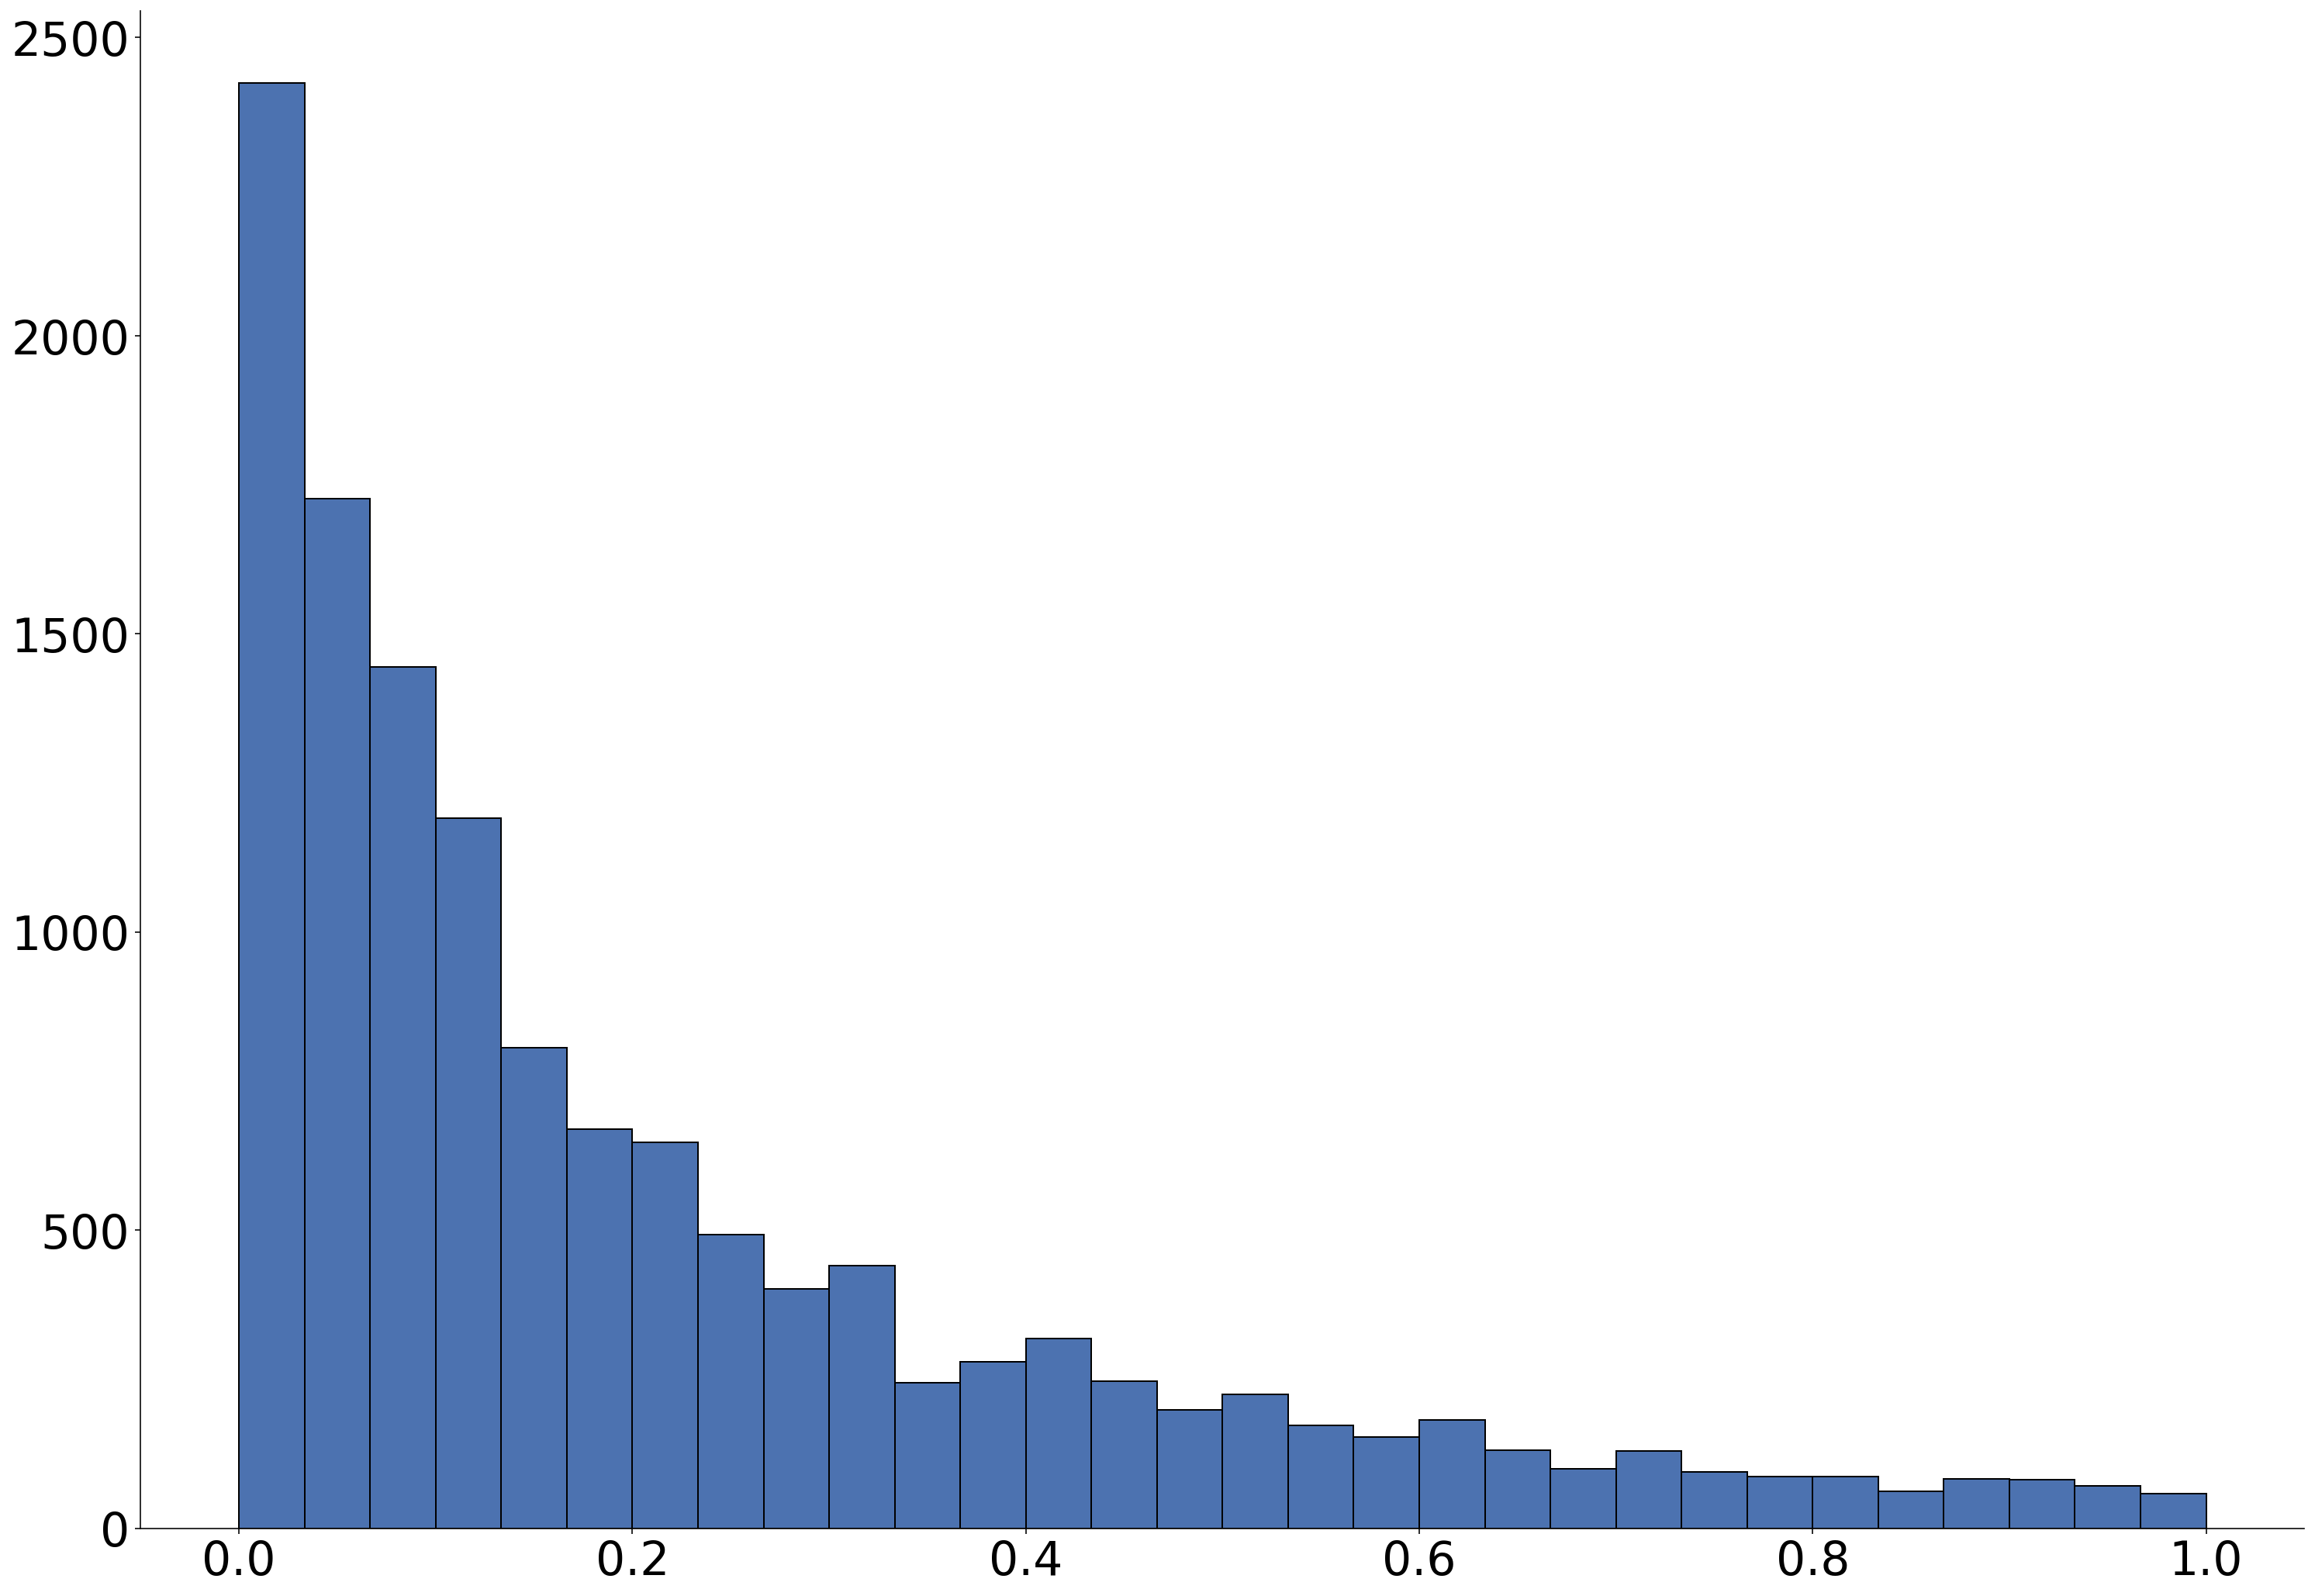

In [72]:
# 히스토 그램을 통해 글로벌 판매량 1B 이상과 이하로 나누어서 분석 
plt.figure(figsize=(25,18))
plt.hist(after_starcraft[after_starcraft['Global_Sales'] < 1]['Global_Sales'], bins = 30);



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

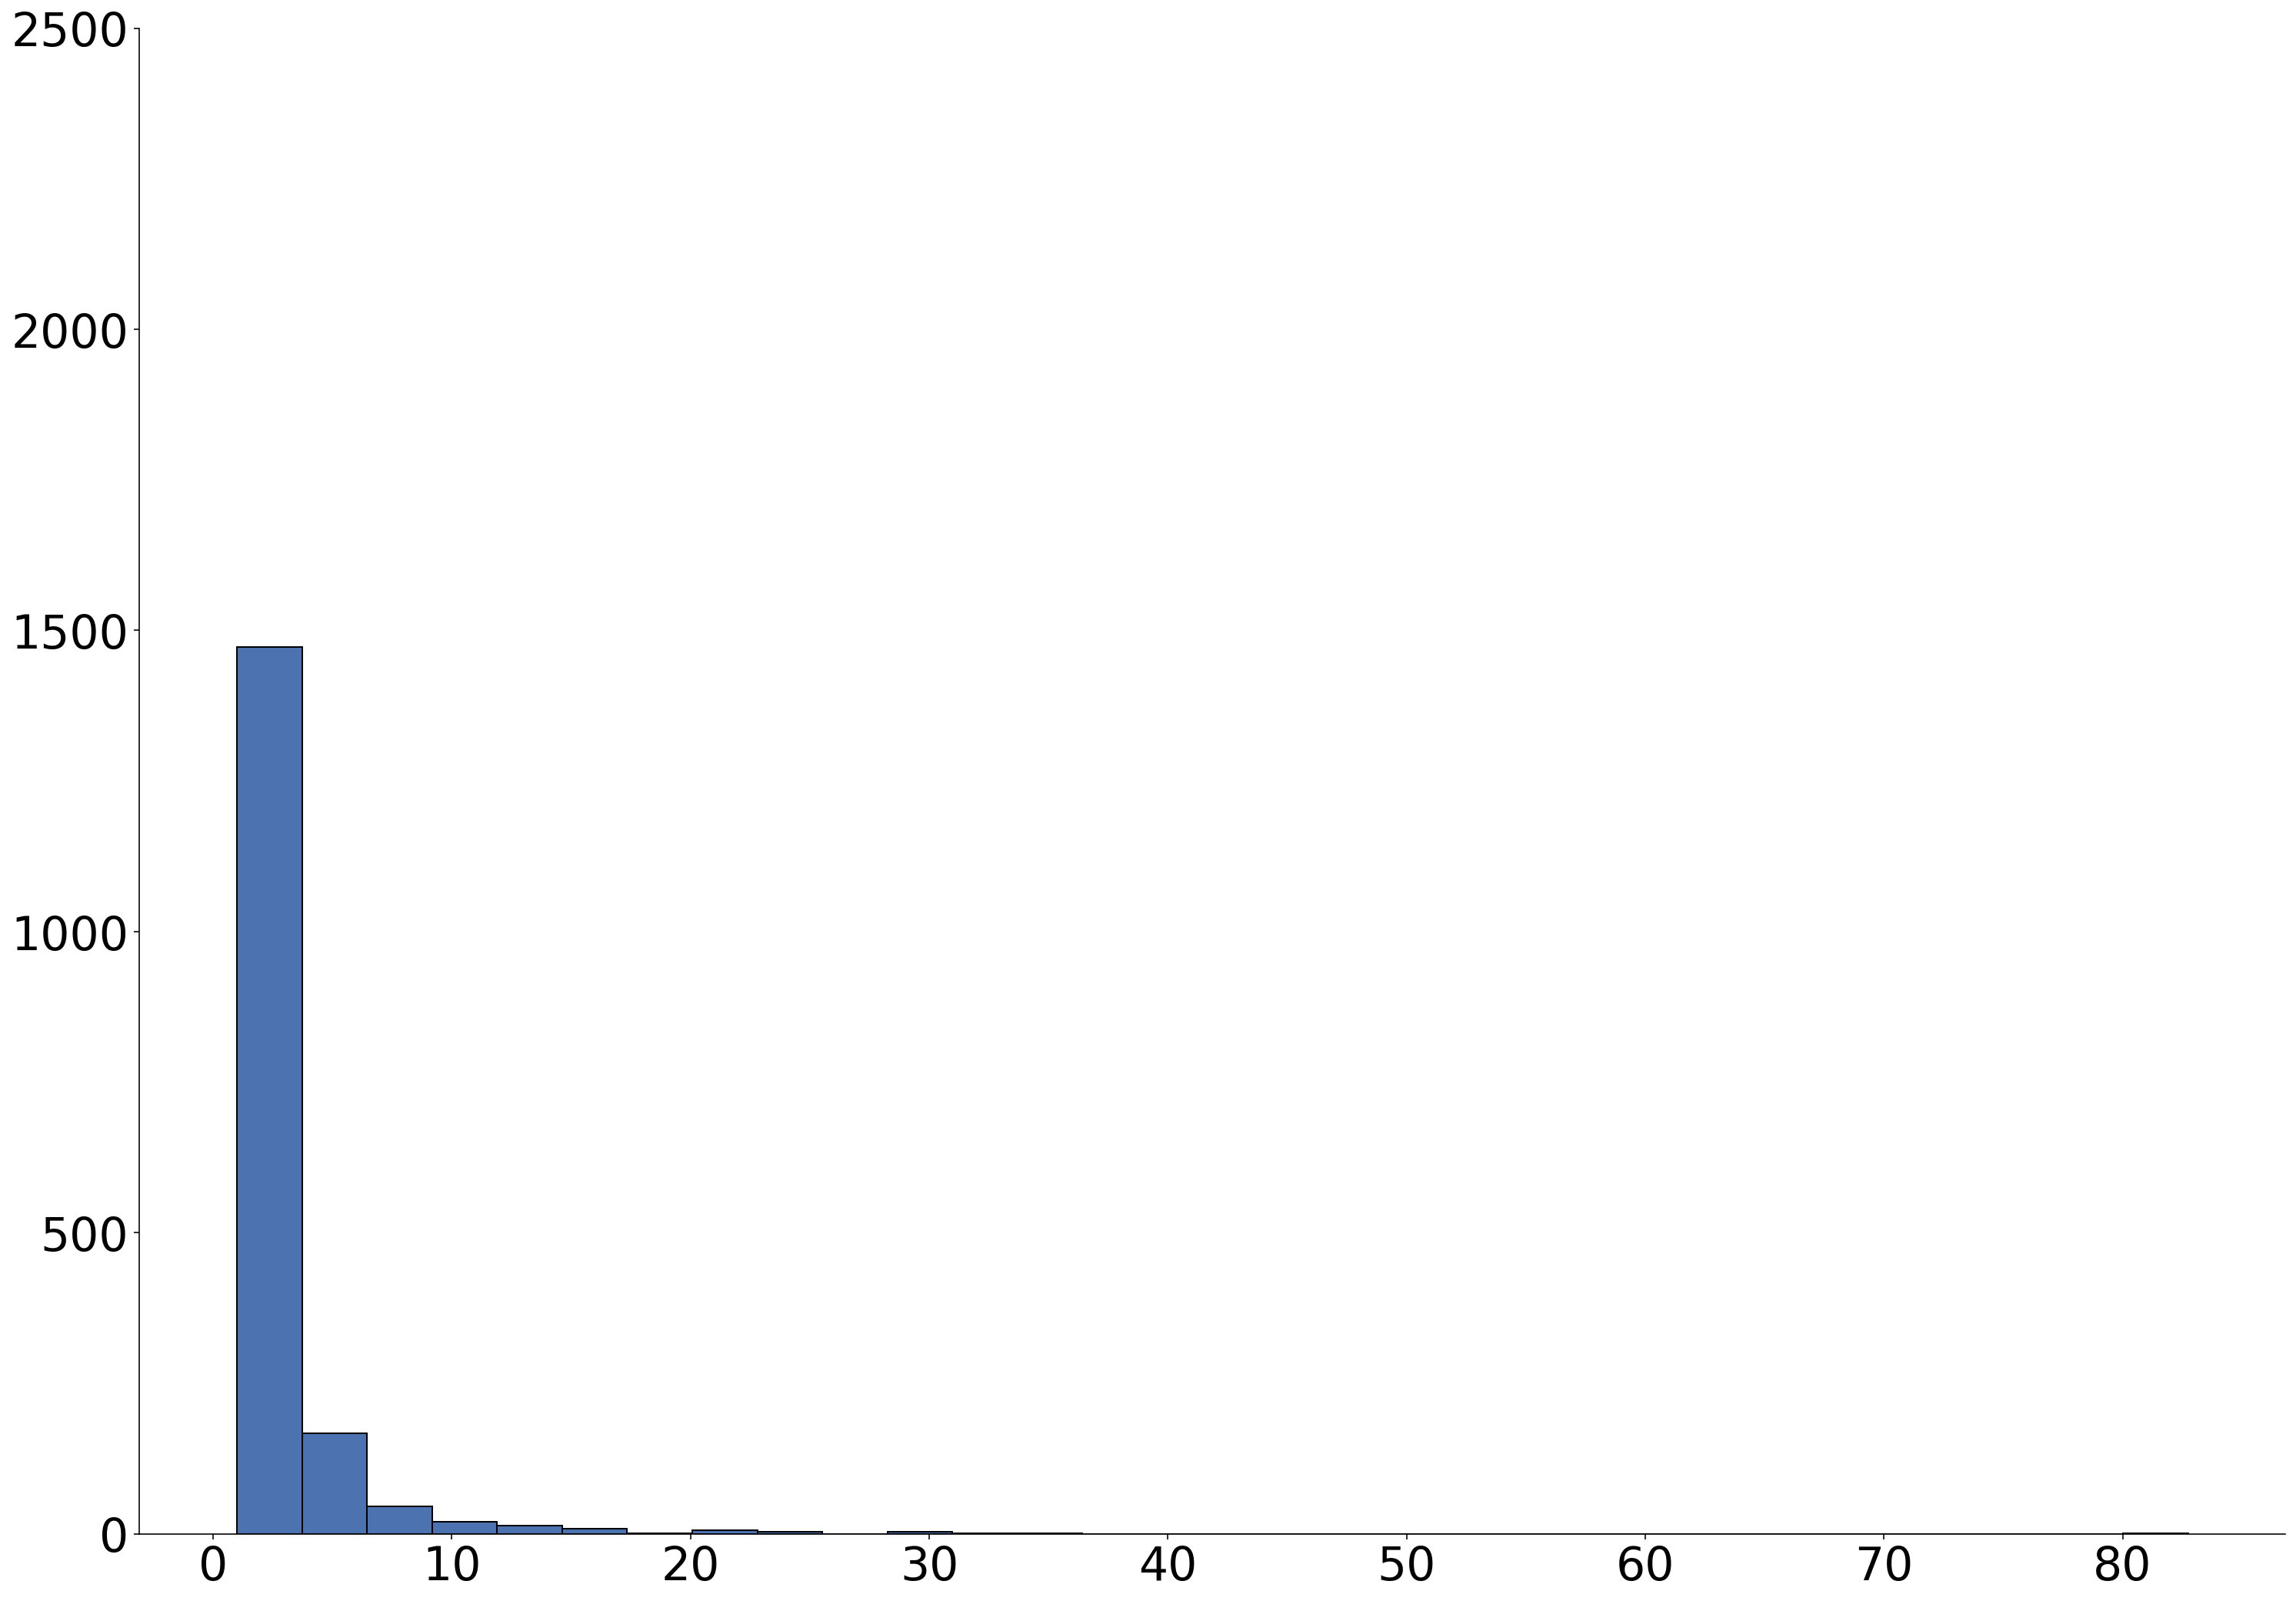

In [73]:
plt.figure(figsize=(25,18))
plt.ylim(0,2500)

plt.hist(after_starcraft[after_starcraft['Global_Sales'] >= 1]['Global_Sales'], bins = 30);




plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [29]:
#데이터 수를 보고 차이가 얼마 안나는것을확인후 사용 
count = len(after_starcraft[after_starcraft['Global_Sales'] < 1]), len(after_starcraft[after_starcraft['Global_Sales'] >= 1])

In [30]:
 count[1]/ count[0] 


0.13161670316393567

In [31]:
after_starcraft_low = after_starcraft[after_starcraft['Global_Sales'] < 1]
after_starcraft_high = after_starcraft[after_starcraft['Global_Sales'] >= 1]

# after_starwars_low 분석

### 플렛폼 별로 분석

In [32]:
group_platform_low= after_starcraft_low.groupby(after_starcraft_low['Platform'])
group_platform_low_sum = group_platform_low.sum()
group_platform_low_sum

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                                  
3DS        909912     26.46     17.14     36.71         3.92         84.23
DC          92001      0.00      0.00      7.13         0.00          7.13
DS        3982356    201.77     48.21     68.18        21.18        339.34
GB          47996      0.00      0.00      7.89         0.00          7.89
GBA       1434307     92.67     34.27     19.14         2.25        148.33
GC         989698     74.28     19.20      4.26         2.27        100.01
N64        421795     42.37     10.05      4.66         1.22         58.30
PC        1721954     21.41     64.23      0.00        12.85         98.49
PS        1183580     71.19     49.14     37.14        10.93        168.40
PS2       3616556    197.65    116.51     78.77        61.77        454.70
PS3       2129627    133.45     95.33     44.07        40.68        313.53
PS4        529979     20.04     22.77      7.41         8.45         58.67
PSP       2284033     68.67     31.24     56.75        20.22        176.88
PSV        807640     12.33     11.55     19.17         6.18         49.23
SAT         59941      0.00      0.00      3.91         0.00          3.91
SNES         5995      0.00      0.00      0.48         0.00          0.48
WS          12000      0.00      0.00      1.42         0.00          1.42
Wii       2268163    181.08     58.08     18.22        21.55        278.93
WiiU       249686     15.39     10.16      3.35         2.41         31.31
X360      1999830    176.72     79.48      6.33        24.73        287.26
XB        1498737    115.26     36.69      0.77         5.29        158.01
XOne       340519     24.71     13.76      0.08         3.56         42.11

In [33]:
# 플스와 엑스박스 위 는 버전이 업그레이드 된것이라 하나의 플렛폼이라 판단하고 합쳐주었다.

group_platform_ratio = group_platform_low_sum.div(group_platform_low_sum.sum(axis=0), axis=1).iloc[:,1:]
group_platform_ratio.loc['PS_all'] = group_platform_ratio.loc['PS'] +group_platform_ratio.loc['PS2']+group_platform_ratio.loc['PS3']+group_platform_ratio.loc['PS4']
group_platform_ratio.loc['XB_all'] = group_platform_ratio.loc['XB'] +group_platform_ratio.loc['X360']+group_platform_ratio.loc['XOne']
group_platform_ratio.loc['Wii_all'] = group_platform_ratio.loc['Wii'] +group_platform_ratio.loc['WiiU']
group_platform_ratio.drop(index = ['PS', 'PS2', 'PS3','PS4'],inplace = True)
group_platform_ratio.drop(index = ['XB', 'X360', 'XOne'],inplace = True)
group_platform_ratio.drop(index = ['Wii', 'WiiU'],inplace = True)
group_platform_ratio

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
3DS       0.017934  0.023878  0.086206     0.015714      0.029363
DC        0.000000  0.000000  0.016743     0.000000      0.002486
DS        0.136751  0.067163  0.160107     0.084903      0.118296
GB        0.000000  0.000000  0.018528     0.000000      0.002751
GBA       0.062808  0.047742  0.044946     0.009019      0.051709
GC        0.050344  0.026748  0.010004     0.009100      0.034864
N64       0.028717  0.014001  0.010943     0.004891      0.020324
PC        0.014511  0.089481  0.000000     0.051511      0.034334
PSP       0.046542  0.043521  0.133266     0.081055      0.061662
PSV       0.008357  0.016091  0.045017     0.024774      0.017162
SAT       0.000000  0.000000  0.009182     0.000000      0.001363
SNES      0.000000  0.000000  0.001127     0.000000      0.000167
WS        0.000000  0.000000  0.003335     0.000000      0.000495
PS_all    0.286238  0.395300  0.393082     0.488375      0.346969
XB_all    0.214640  0.181009  0.016861     0.134611      0.169904
Wii_all   0.133159  0.095067  0.050653     0.096047      0.108152

In [105]:
def pie_platform(column):
  
  explode = [0.13, 0, 0, 0, 0 ,0,0,0,0,0,0,0,0,0,0,0]
  wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
  data = group_platform_ratio[column].sort_values(ascending = False)
  plt.pie(data, explode= explode,wedgeprops = wedgeprops,
          autopct ='%.0f%%',labels = data.index,
          startangle = 90, counterclock = False);
  plt.title(column, fontsize = 30)

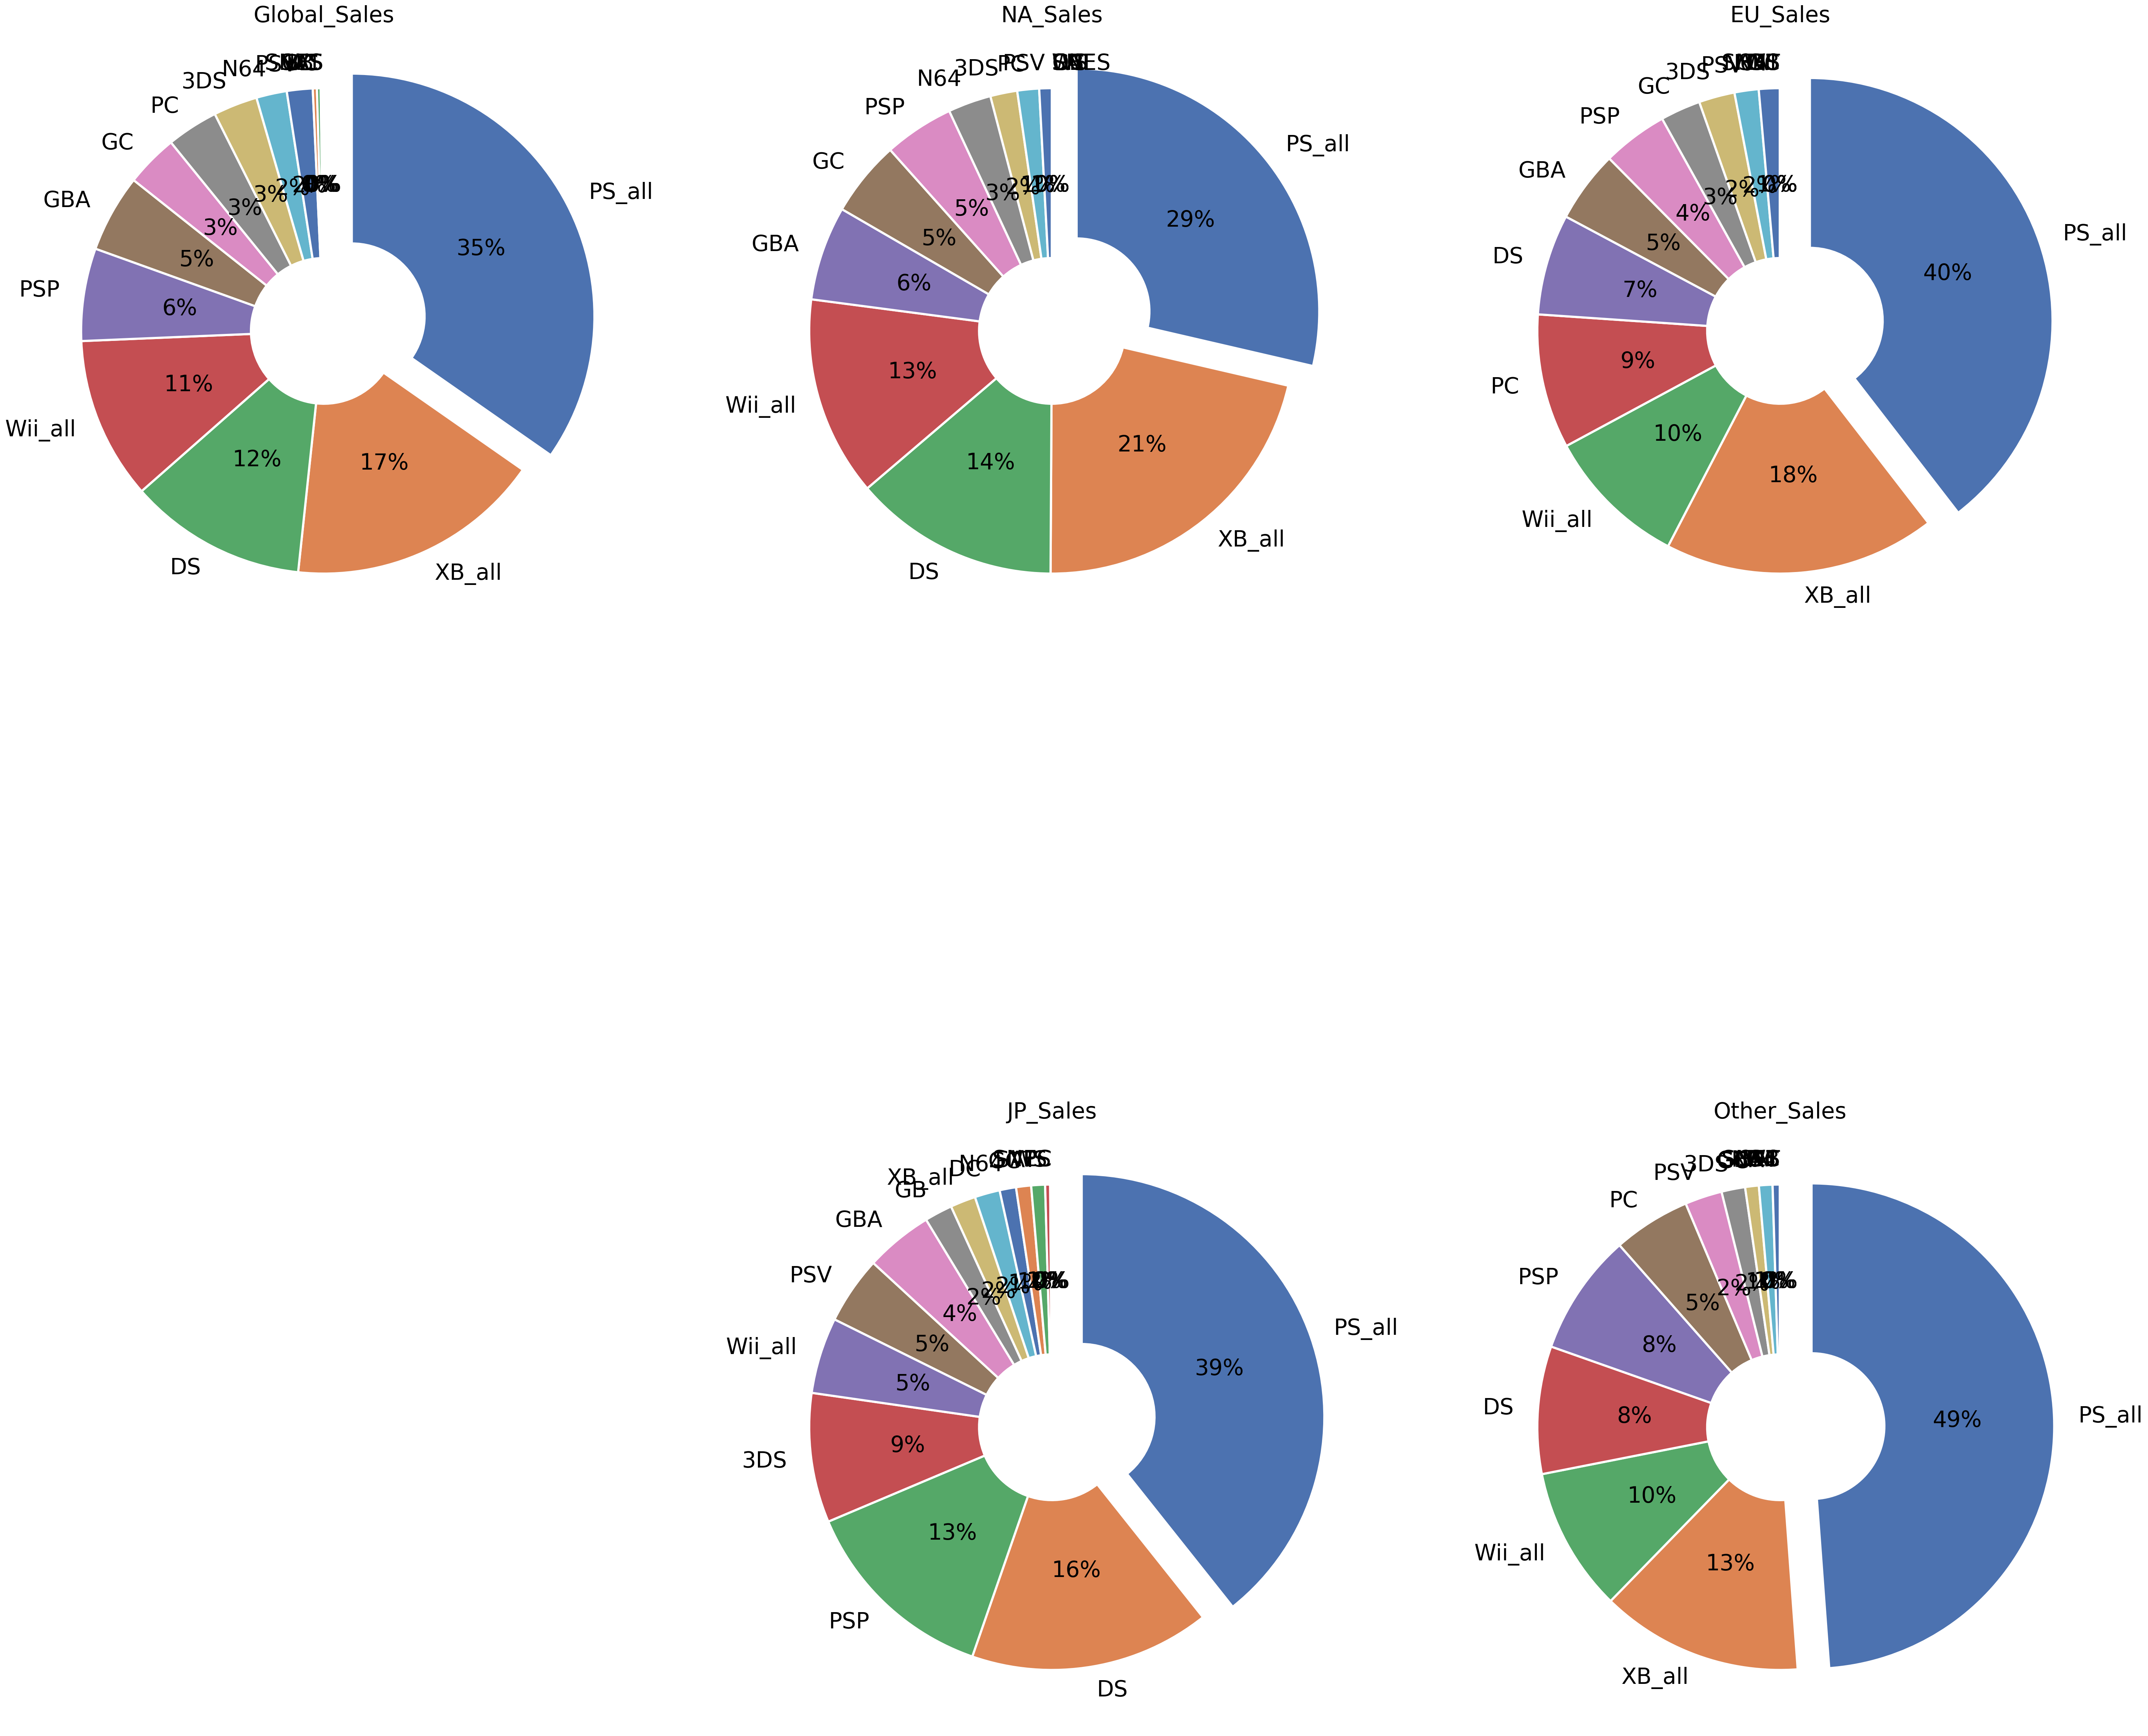

In [106]:
plt.figure(figsize=(50, 50))

plt.subplot(2, 3, 1)
pie_platform('Global_Sales');

plt.subplot(2, 3, 2)
pie_platform('NA_Sales')

plt.subplot(2, 3, 3)
pie_platform('EU_Sales')

plt.subplot(2, 3, 5)
pie_platform('JP_Sales')

plt.subplot(2, 3, 6)
pie_platform('Other_Sales')

In [36]:
# 장르별로 그룹한후에 컬럼별로 더해준다. 

group_genre_low = after_starcraft_low.groupby(after_starcraft_low['Genre'])

In [37]:
group_genre_low_sum = group_genre_low.sum()

In [38]:
# 기타값을 삭제하고 분석실행

group_genre_low_sum.drop(index = 'Misc', inplace = True)

In [39]:
#열더해준 값으로 전체를 나누어 주어 비율로 나타낸다. 

group_genre_low_ratio = group_genre_low_sum.div(group_genre_low_sum.sum(axis=0), axis=1).iloc[:,1:]
group_genre_low_ratio

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action        0.242752  0.262122  0.199362     0.273052      0.243850
Adventure     0.043601  0.048304  0.092902     0.042081      0.051956
Fighting      0.055446  0.048458  0.080109     0.053381      0.057149
Platform      0.069728  0.061860  0.025349     0.056003      0.059983
Puzzle        0.028473  0.025617  0.023951     0.021199      0.026453
Racing        0.093372  0.109855  0.015853     0.096863      0.086373
Role-Playing  0.070230  0.068908  0.274274     0.076568      0.100641
Shooter       0.096167  0.118924  0.021999     0.108660      0.092029
Simulation    0.063832  0.047440  0.057688     0.056907      0.058175
Sports        0.211933  0.171530  0.130543     0.183150      0.187174
Strategy      0.024466  0.036983  0.077972     0.032137      0.036216

In [107]:
#나라별로 선호도가 다른지 확인해보기 위한 파이 그래프 함수 

def pie_low(column):
  explode = [0.13, 0, 0, 0, 0 ,0,0,0,0,0,0]
  wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
  data = group_genre_low_ratio[column].sort_values(ascending = False)
  plt.pie(data, explode= explode,wedgeprops = wedgeprops,
          autopct ='%.0f%%',labels = data.index,
          startangle = 90, counterclock = False);
  plt.title(column, fontsize = 30)

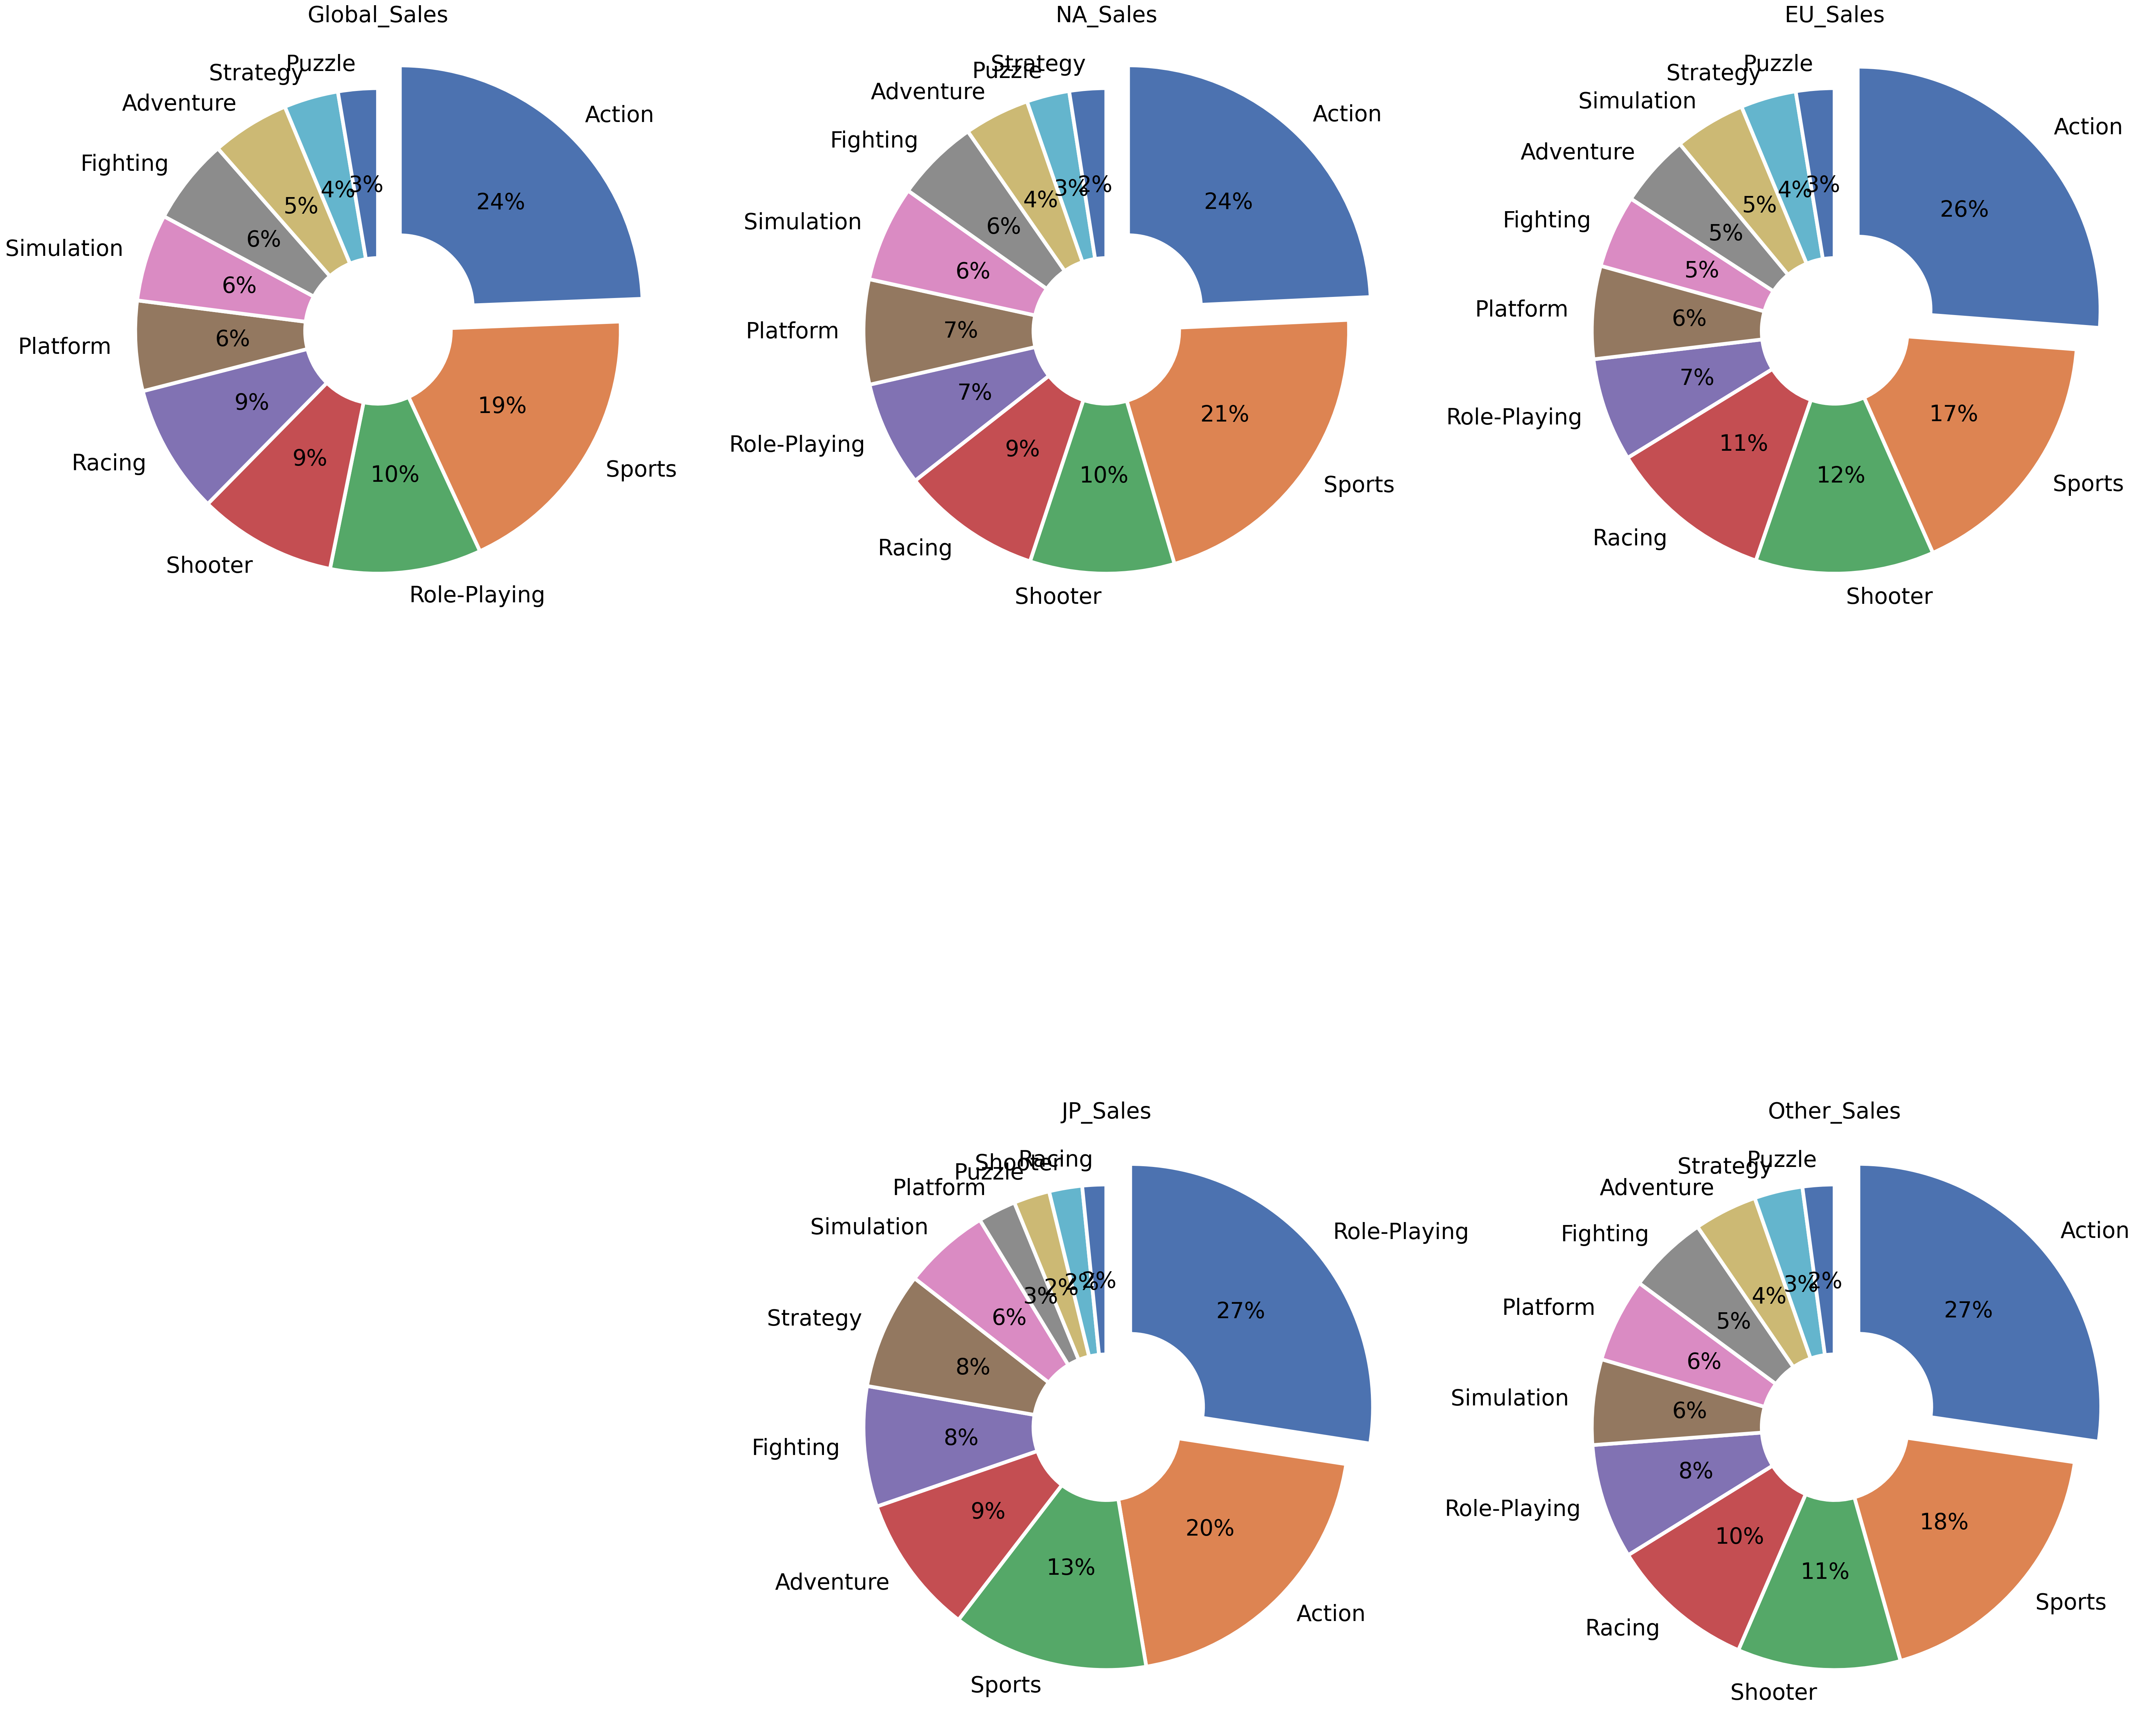

In [108]:
'''이 위에 큰 제목을 하는 법법
plt.title("Preferred Game Genre", fontsize=30)

'''
plt.figure(figsize=(50, 50))
plt.subplot(2, 3, 1)
pie_low('Global_Sales');

plt.subplot(2, 3, 2)
pie_low('NA_Sales')

plt.subplot(2, 3, 3)
pie_low('EU_Sales')

plt.subplot(2, 3, 5)
pie_low('JP_Sales')

plt.subplot(2, 3, 6)
pie_low('Other_Sales')

In [42]:
#연도별 트랜드 분석

asl_trend= after_starcraft_low.groupby([after_starcraft_low['Year'], after_starcraft_low['Genre']]).sum()
global_trend = asl_trend[['Global_Sales']]

In [43]:
year_global_trend = pd.DataFrame()
for i in range(25):
  year = 1998 + i
  try:
    tmp = global_trend.loc[year].sort_values(by='Global_Sales', ascending=False).iloc[0]['Global_Sales']
    tmp2 = global_trend[global_trend['Global_Sales']== tmp]
    year_global_trend = year_global_trend.append(tmp2)
  except:
    pass
year_global_trend.reset_index(inplace = True)

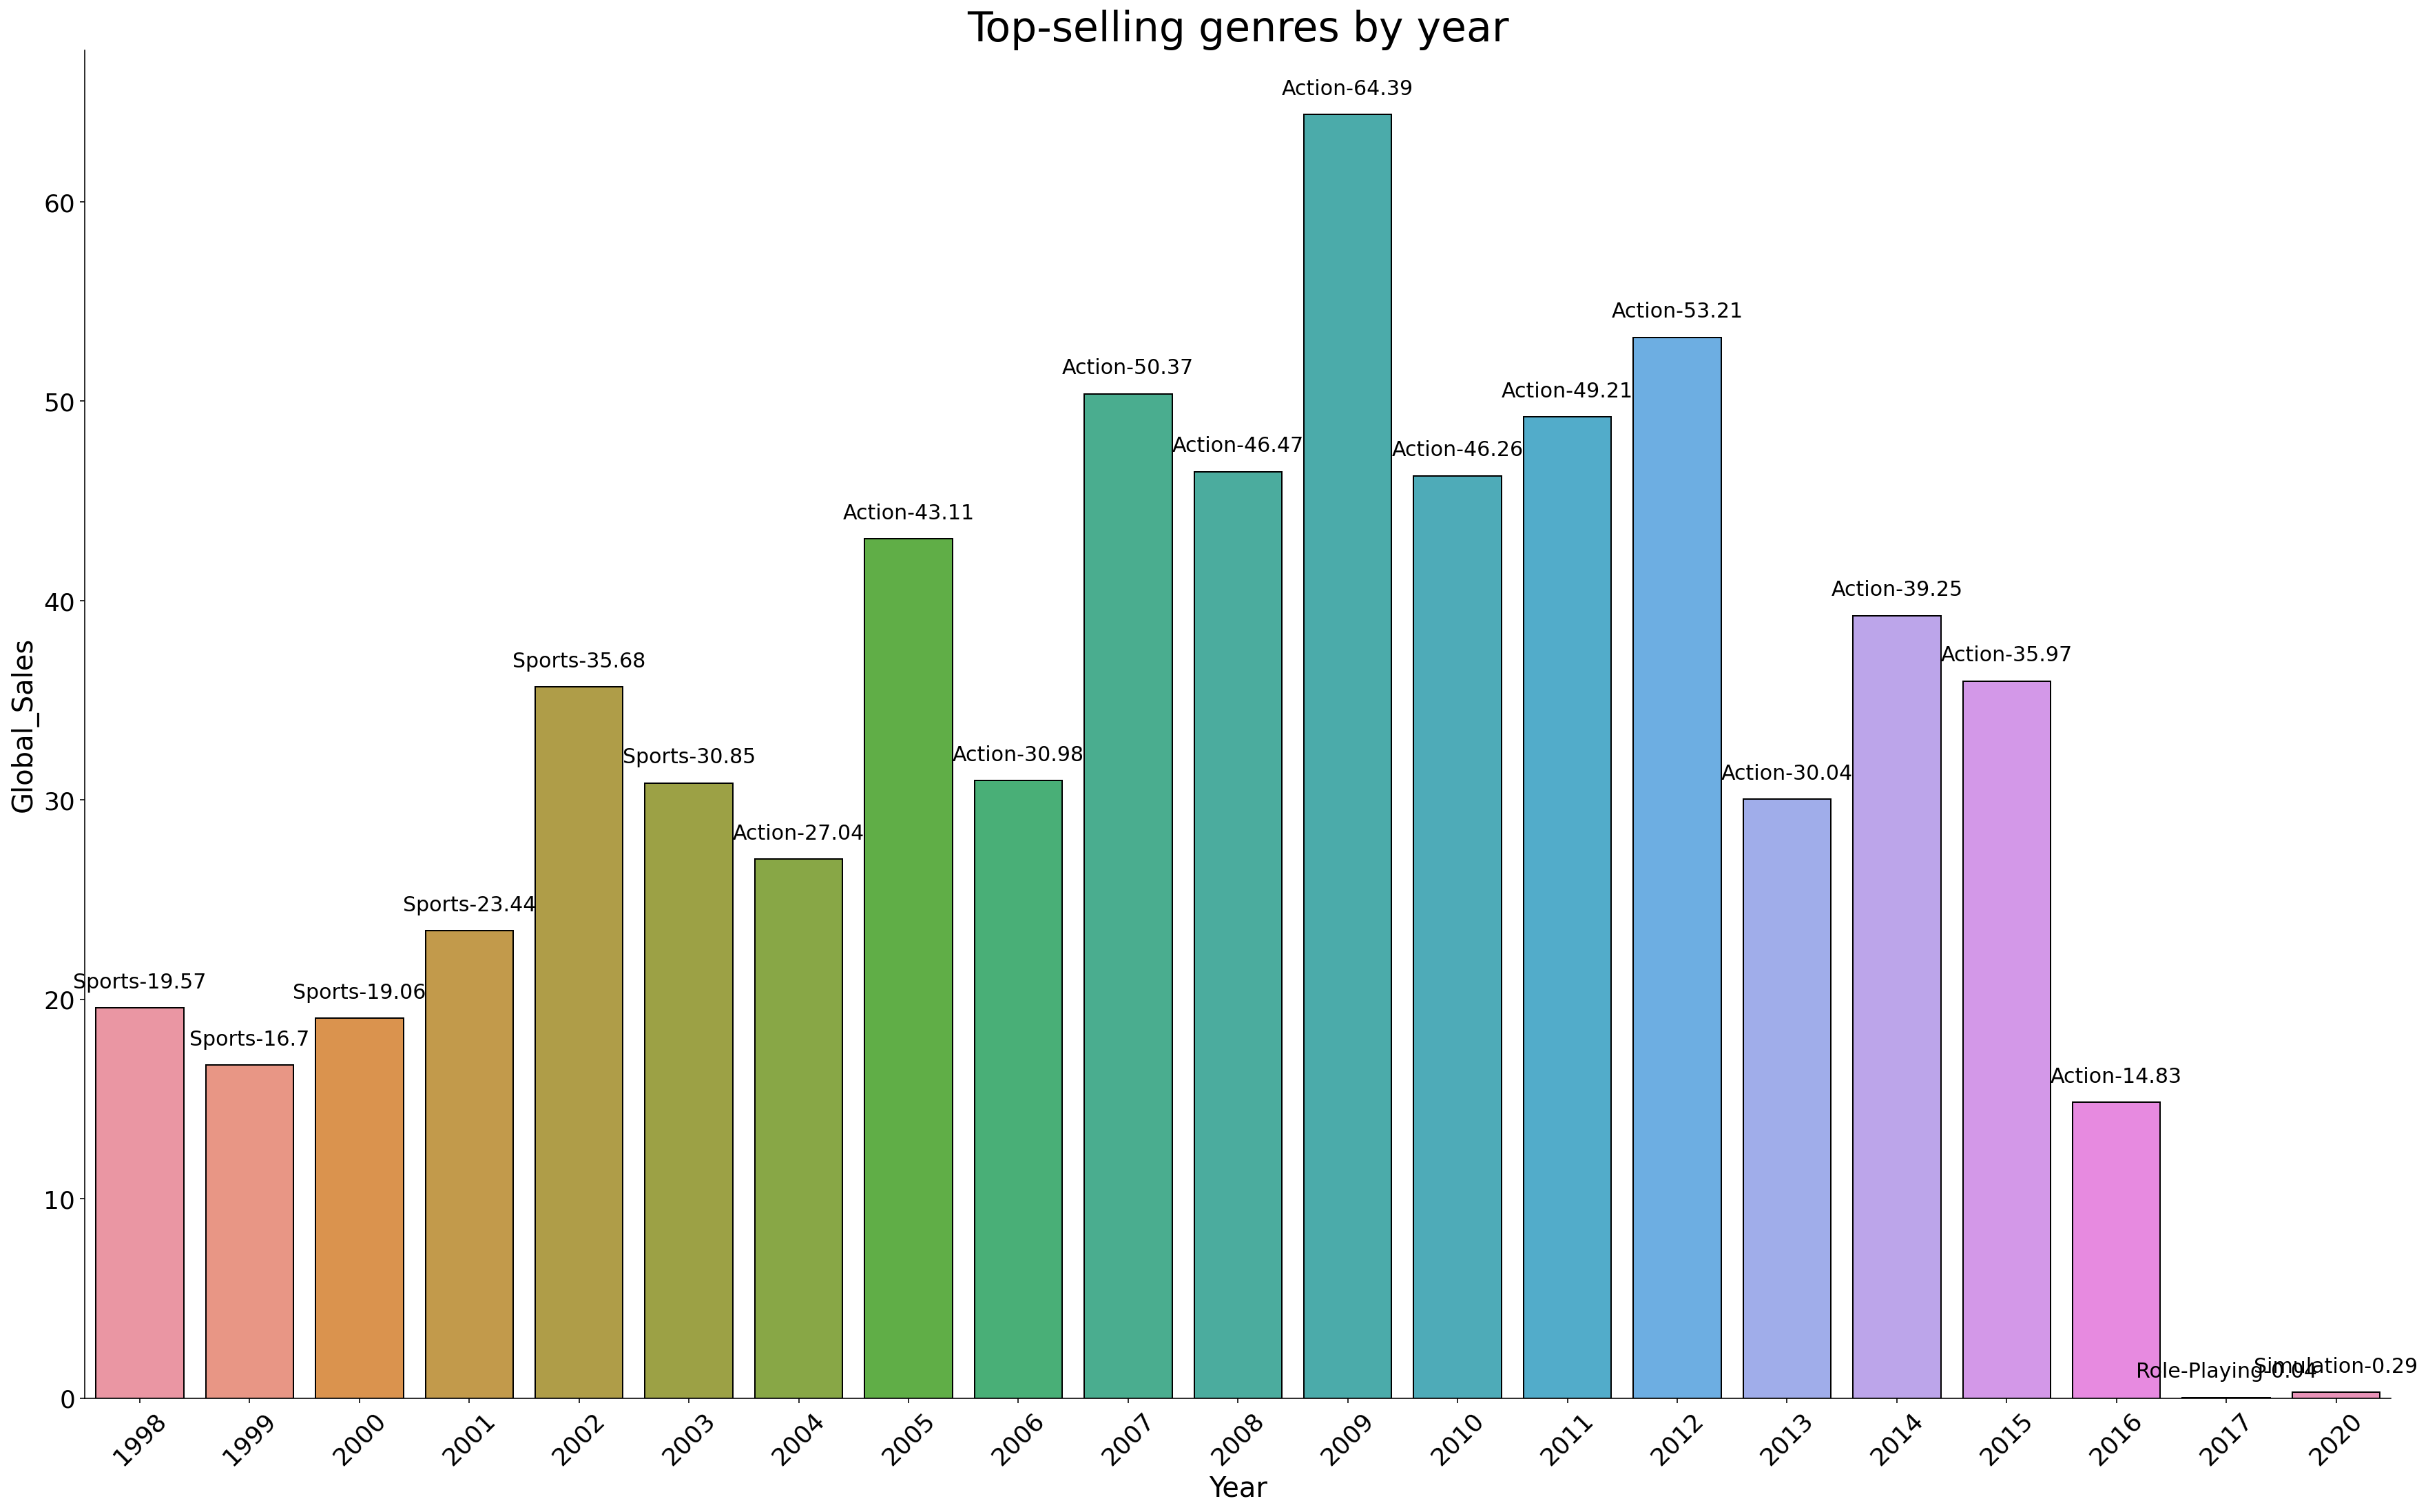

In [117]:
plt.figure(figsize=(30, 18))
plt.title("Top-selling genres by year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Global_Sales_max", fontsize=20 )
plt.xticks(rotation =45 ,fontsize=18) 
plt.yticks(fontsize=18) 
g = sns.barplot(x = 'Year', y='Global_Sales',data = year_global_trend)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

genre = year_global_trend['Genre']
index = 0
for value in year_global_trend['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), size=15, rotation= 0, ha="center")
    index += 1

In [45]:
change_NA = []
for i in range(1,21):
  a = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i]['NA_Sales'].sum()
  b = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i+1]['NA_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_NA.append(rate_of_change)

change_EU = []
for i in range(1,21):
  a = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i]['EU_Sales'].sum()
  b = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i+1]['EU_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_EU.append(rate_of_change)

change_JP = []
for i in range(1,21):
  a = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i]['JP_Sales'].sum()
  b = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i+1]['JP_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_JP.append(rate_of_change)

change_GL = []
for i in range(1,21):
  a = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i]['Global_Sales'].sum()
  b = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i+1]['Global_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_GL.append(rate_of_change)

change_OT = []
for i in range(1,21):
  a = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i]['Other_Sales'].sum()
  b = after_starcraft_low[after_starcraft_low['Year'] == 2000 + i+1]['Other_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_OT.append(rate_of_change)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide b

In [134]:
df_change = pd.DataFrame({'NA' : change_NA,
              'EU': change_EU,
              'JP': change_JP,
              'Other': change_OT,
              'Global': change_GL})
df_change = df_change.iloc[:15, :]
index_list = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
df_change.index = index_list
df_change

NA     EU     JP  Other  Global
2001  0.708  0.403  0.453  0.269   0.558
2002  0.022  0.070 -0.241  0.152   0.007
2003  0.044 -0.068 -0.092 -0.023  -0.004
2004  0.279 -0.055  0.346  0.357   0.206
2005 -0.213 -0.358  0.653  0.022  -0.139
2006  0.385  0.553  0.020  0.791   0.373
2007  0.188  0.743 -0.047  0.263   0.255
2008  0.009  0.139 -0.201  0.089   0.025
2009 -0.242 -0.186  0.277 -0.328  -0.194
2010 -0.236 -0.038  0.122 -0.126  -0.126
2011 -0.405 -0.313 -0.167 -0.345  -0.332
2012 -0.273 -0.178 -0.235 -0.178  -0.228
2013  0.027  0.221 -0.206  0.144   0.050
2014 -0.185 -0.181  0.130 -0.228  -0.138
2015 -0.600 -0.617 -0.429 -0.619  -0.572

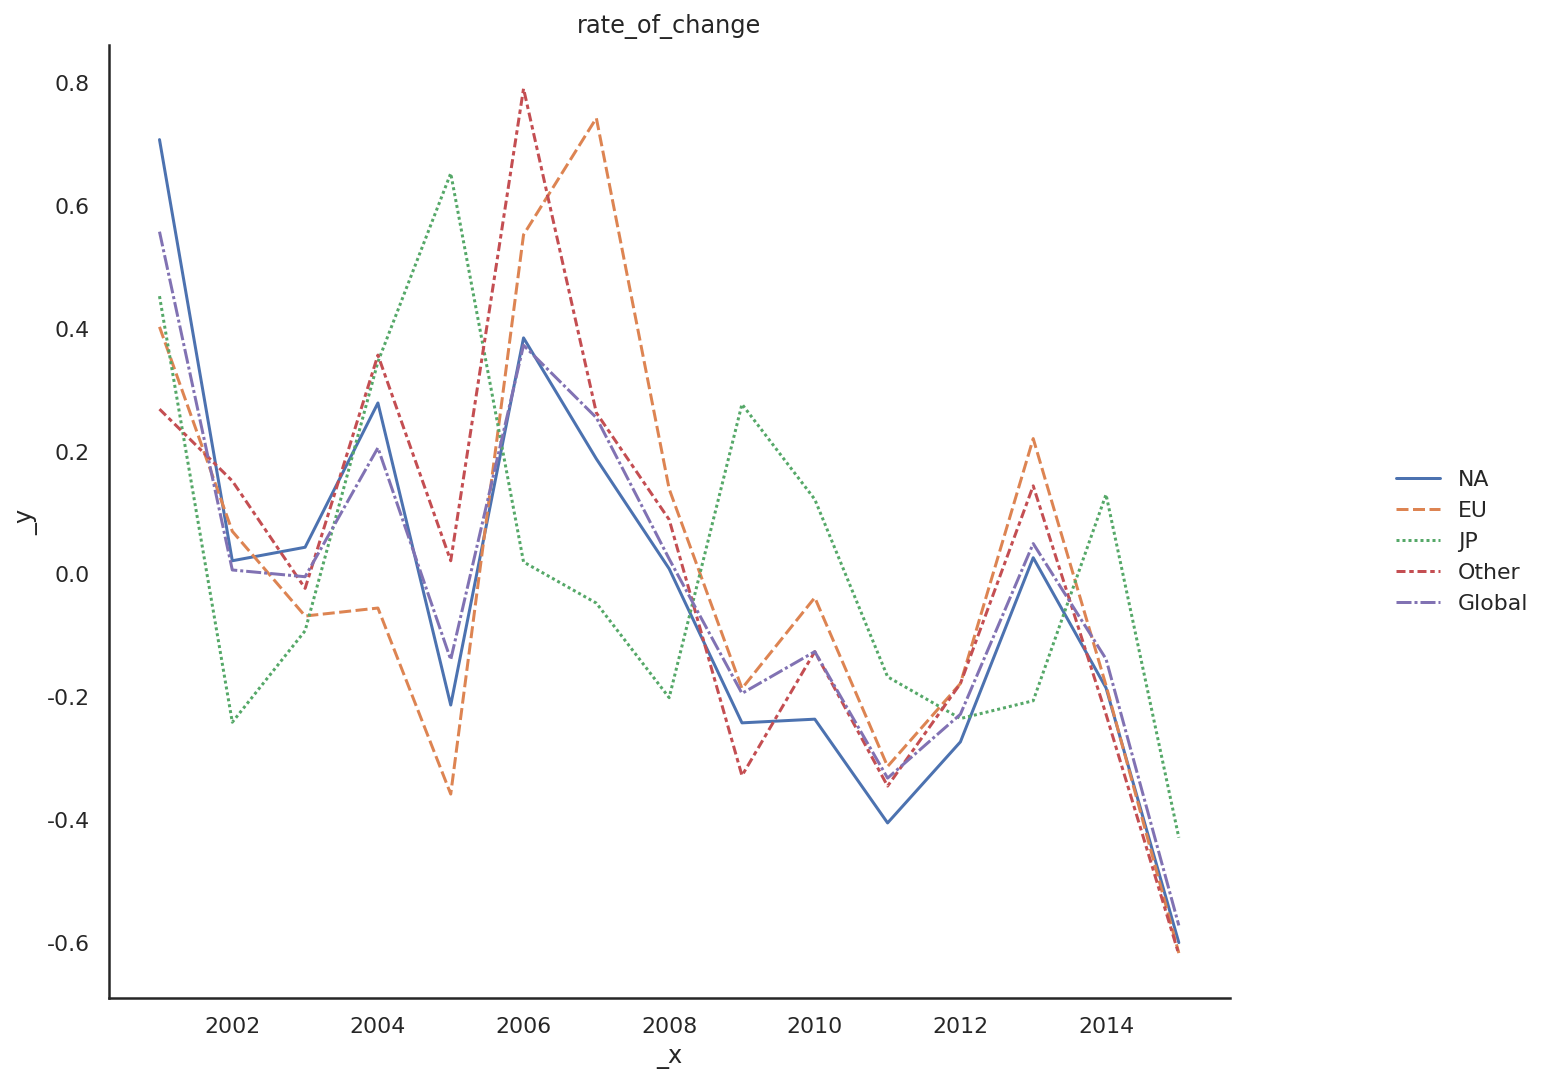

In [173]:
# 추축하건데 스마트폰의 보급이후로 게임의 판매량이 급격하게 안좋아졌다고 생각한다. 
sns.set_style("white")
fig = sns.relplot(kind = 'line',ci = None,data =df_change);
fig.fig.set_size_inches(12,8)

fig.set(title = "rate_of_change");

# after_strarwars_high 분석
판매량이 1b 이상 인 데이터들 분석석

In [156]:
group_genre_high = after_starcraft_high.groupby(after_starcraft_high['Genre'])
group_genre_high_sum = group_genre_high.sum()
group_genre_high_sum.drop(index = 'Misc', inplace = True)
group_genre_high_ratio = group_genre_high_sum.div(group_genre_high_sum.sum(axis=0), axis=1).iloc[:,1:]
group_genre_high_ratio

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action        0.225389  0.234412  0.143261     0.261316      0.223889
Adventure     0.015372  0.017665  0.013441     0.014434      0.015802
Fighting      0.055723  0.039374  0.049927     0.047887      0.049179
Platform      0.095648  0.084144  0.118709     0.069637      0.091563
Puzzle        0.014862  0.019164  0.038887     0.013156      0.018415
Racing        0.089132  0.105119  0.063721     0.112742      0.094139
Role-Playing  0.099663  0.091618  0.361259     0.075477      0.120504
Shooter       0.180619  0.160592  0.035427     0.165785      0.158359
Simulation    0.041561  0.055384  0.065063     0.038036      0.047863
Sports        0.168704  0.181559  0.089167     0.194522      0.167595
Strategy      0.013328  0.010970  0.021138     0.007008      0.012691

In [157]:
#
def pie_high(column):
  explode = [0.13, 0, 0, 0 ,0,0,0,0,0,0,0]
  wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
  data = group_genre_high_ratio[column].sort_values(ascending = False)
  plt.pie(data, explode= explode,wedgeprops = wedgeprops,
          autopct ='%.0f%%',labels = data.index, labeldistance = 1.2,
          startangle = 90, counterclock = False);
  plt.title(column, fontsize = 30)

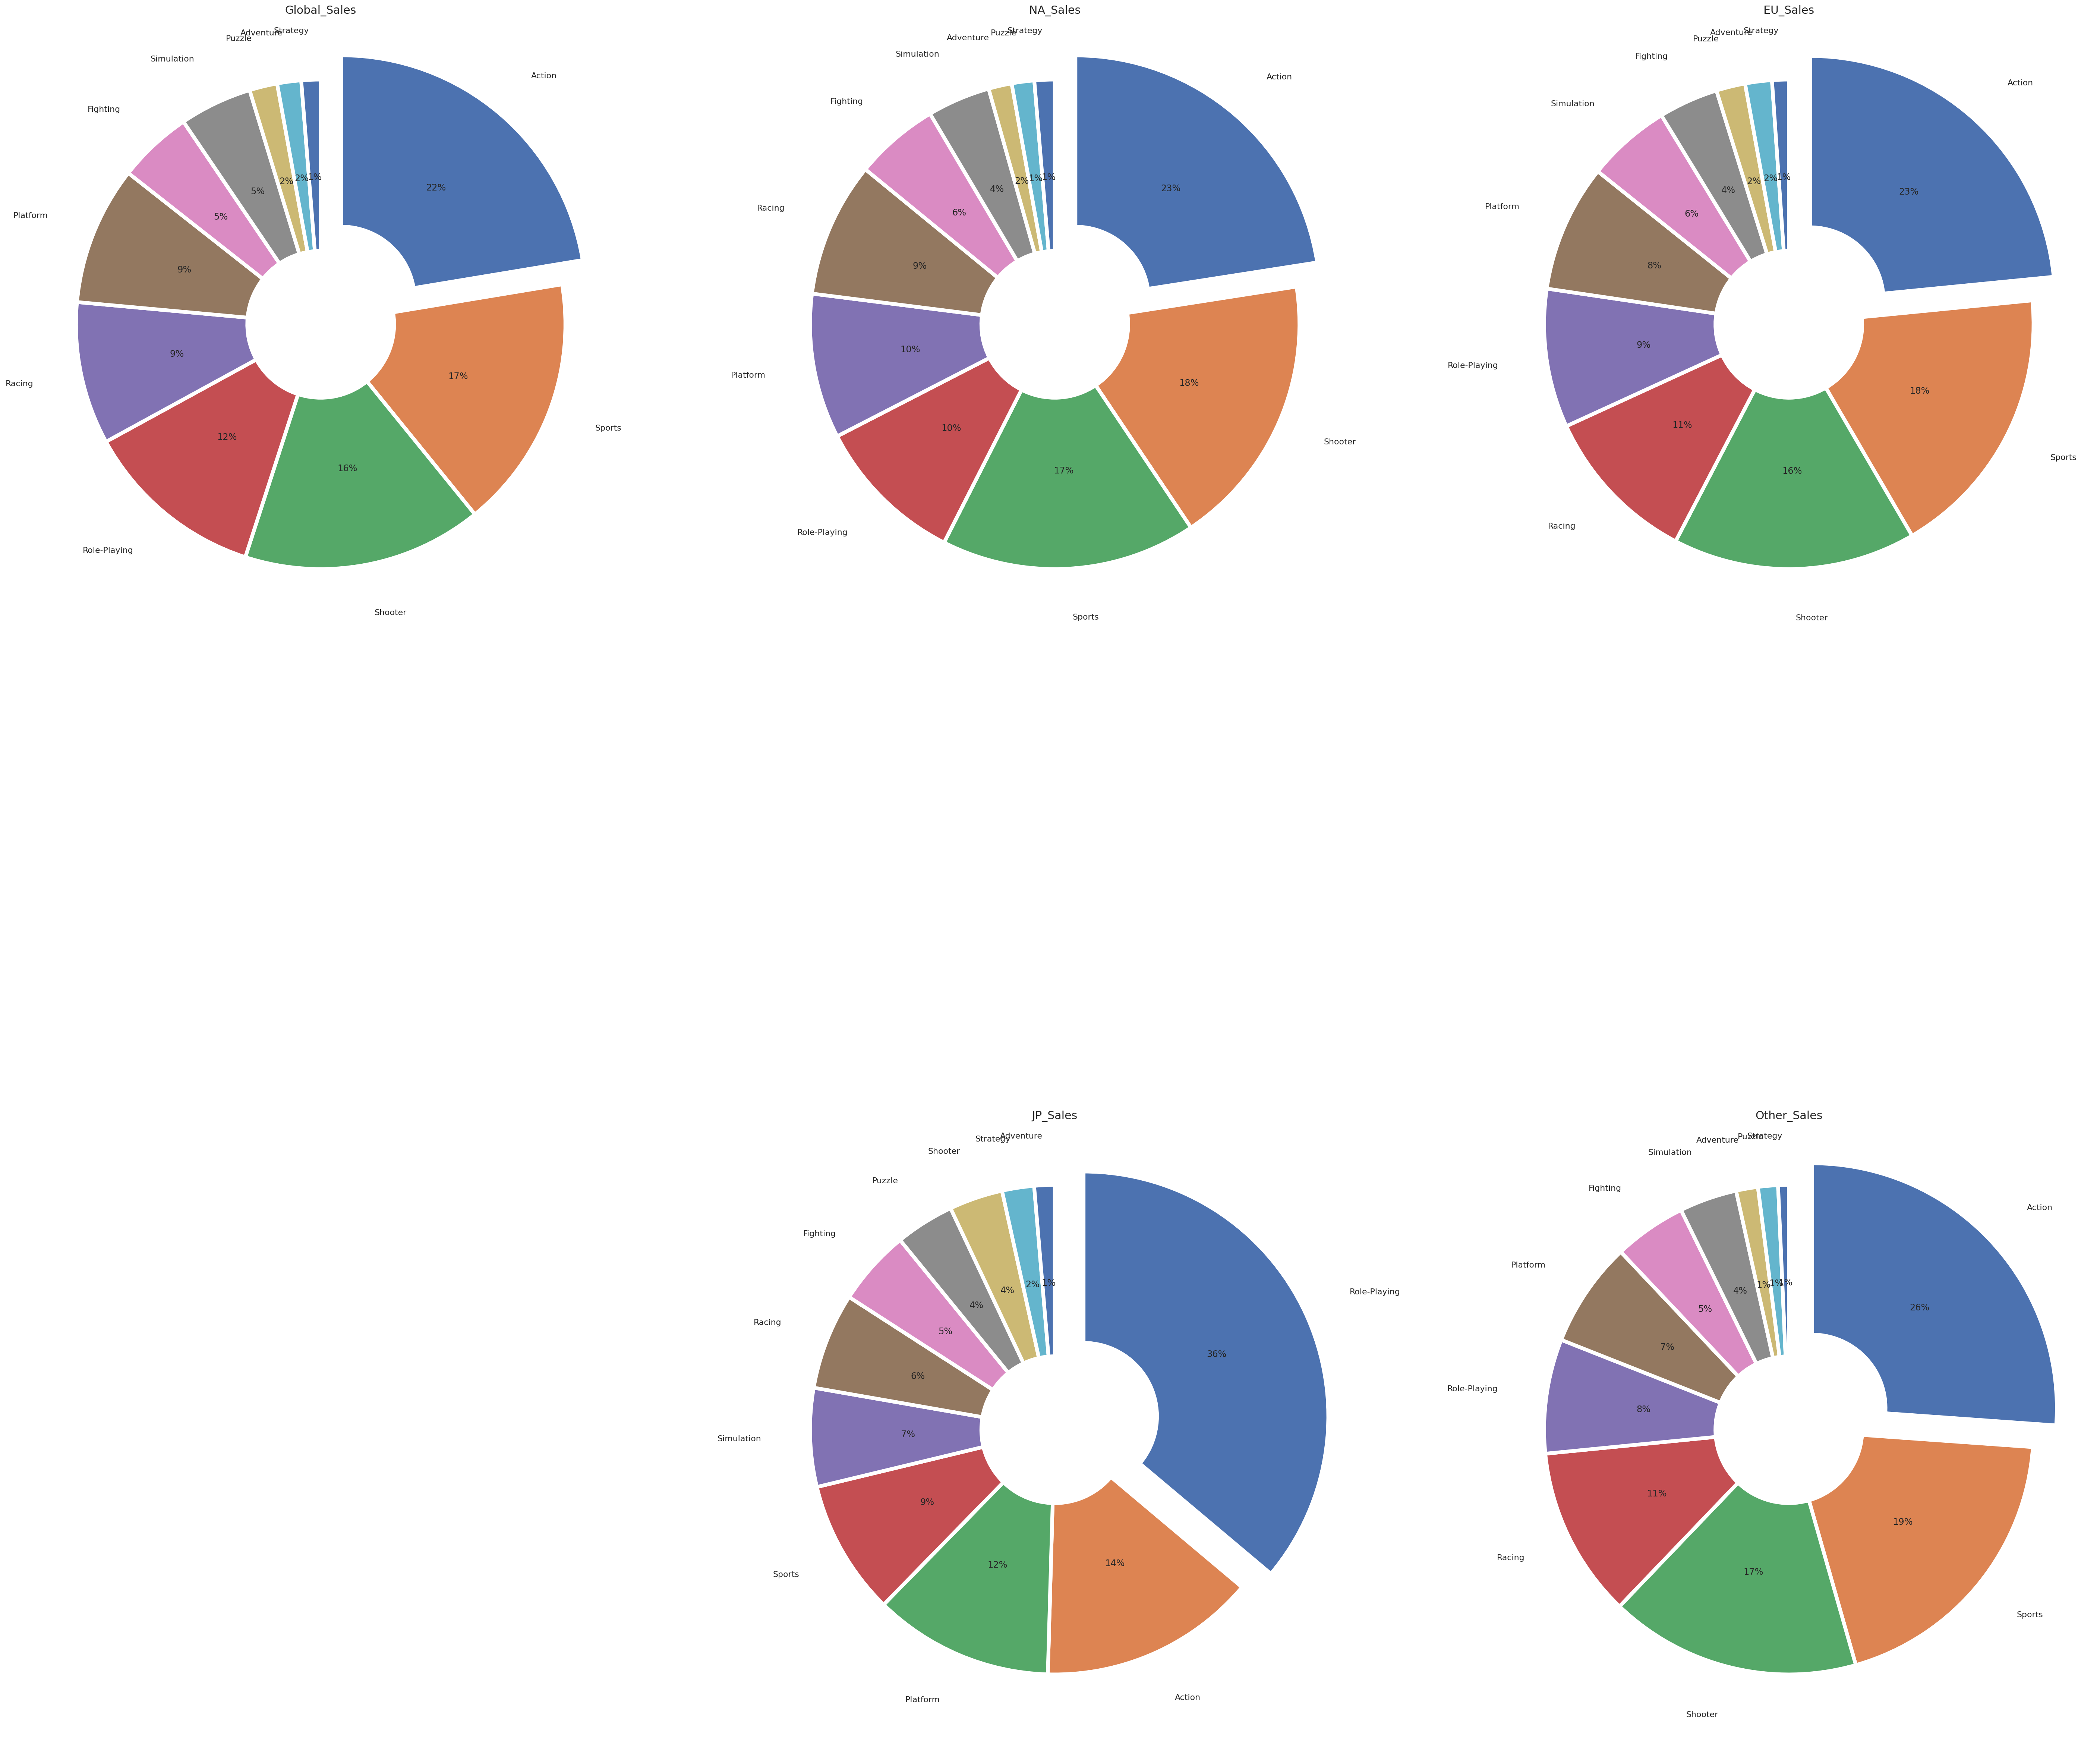

In [159]:
plt.figure(figsize=(50, 50))
plt.subplot(2, 3, 1)
pie_high('Global_Sales');

plt.subplot(2, 3, 2)
pie_high('NA_Sales')

plt.subplot(2, 3, 3)
pie_high('EU_Sales')

plt.subplot(2, 3, 5)
pie_high('JP_Sales')

plt.subplot(2, 3, 6)
pie_high('Other_Sales')

In [52]:
# 플렛폼 별로 분석 

group_platform_high= after_starcraft_high.groupby(after_starcraft_high['Platform'])
group_platform_high_sum = group_platform_high.sum()
group_platform_high_sum

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                                 
3DS        92592     46.40     36.76     56.04         7.82        147.02
DC         11996      5.43      1.69      1.43         0.27          8.82
DS        287096    186.16    145.74    106.65        38.96        477.51
GB         43987     34.77     21.10     26.42         3.72         86.01
GBA       136186     85.59     38.10     27.42         5.25        156.36
GC         94142     57.46     18.92     16.61         2.81         95.80
N64        69964     49.10     15.76     18.38         1.57         84.81
PC        106388     47.80     54.43      0.08         9.92        112.23
PS        251864    142.98     87.26     35.80        13.76        279.80
PS2       635155    370.89    214.01     54.66       125.44        765.00
PS3       482430    254.55    239.29     34.20        99.26        627.30
PS4       145048     75.76     99.79      6.63        33.99        216.17
PSP       112378     37.83     35.59     18.37        21.10        112.89
PSV        16098      3.74      4.68      1.58         2.18         12.18
Wii       311349    314.02    201.53     47.24        56.71        619.50
WiiU       38258     22.93     13.40      9.44         4.04         49.81
X360      474334    417.06    195.18      5.91        58.99        677.14
XB        102169     63.98     21.58      0.61         3.02         89.19
XOne       86616     58.48     31.87      0.26         8.36         98.97

In [53]:
group_platform_high_ratio = group_platform_high_sum.div(group_platform_high_sum.sum(axis=0), axis=1).iloc[:,1:]
group_platform_high_ratio.loc['PS_all'] = group_platform_high_ratio.loc['PS'] +group_platform_high_ratio.loc['PS2']+group_platform_high_ratio.loc['PS3']+group_platform_high_ratio.loc['PS4']
group_platform_high_ratio.loc['XB_all'] = group_platform_high_ratio.loc['XB'] +group_platform_high_ratio.loc['X360']+group_platform_high_ratio.loc['XOne']
group_platform_high_ratio.loc['Wii_all'] = group_platform_high_ratio.loc['Wii'] +group_platform_high_ratio.loc['WiiU']
group_platform_high_ratio.drop(index = ['PS', 'PS2', 'PS3','PS4'],inplace = True)
group_platform_high_ratio.drop(index = ['XB', 'X360', 'XOne'],inplace = True)
group_platform_high_ratio.drop(index = ['Wii', 'WiiU'],inplace = True)
group_platform_high_ratio

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
3DS       0.020396  0.024894  0.119813     0.015729      0.031171
DC        0.002387  0.001144  0.003057     0.000543      0.001870
DS        0.081831  0.098694  0.228016     0.078364      0.101242
GB        0.015284  0.014289  0.056486     0.007482      0.018236
GBA       0.037623  0.025801  0.058624     0.010560      0.033152
GC        0.025258  0.012813  0.035512     0.005652      0.020312
N64       0.021583  0.010673  0.039296     0.003158      0.017982
PC        0.021012  0.036860  0.000171     0.019953      0.023795
PSP       0.016629  0.024101  0.039275     0.042440      0.023935
PSV       0.001644  0.003169  0.003378     0.004385      0.002582
PS_all    0.371080  0.433642  0.280696     0.548002      0.400353
XB_all    0.237159  0.168371  0.014496     0.141541      0.183462
Wii_all   0.148114  0.145549  0.121181     0.122192      0.141908

In [160]:
def pie_platform_high(column):
  explode = [0.13, 0, 0, 0, 0 ,0,0,0,0,0,0,0,0,0,0,0]
  wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
  data = group_platform_high_ratio[column].sort_values(ascending = False)
  plt.pie(data, explode= explode,wedgeprops = wedgeprops,
          autopct ='%.0f%%',labels = data.index,
          startangle = 90, counterclock = False);
  plt.title(column, fontsize = 30)

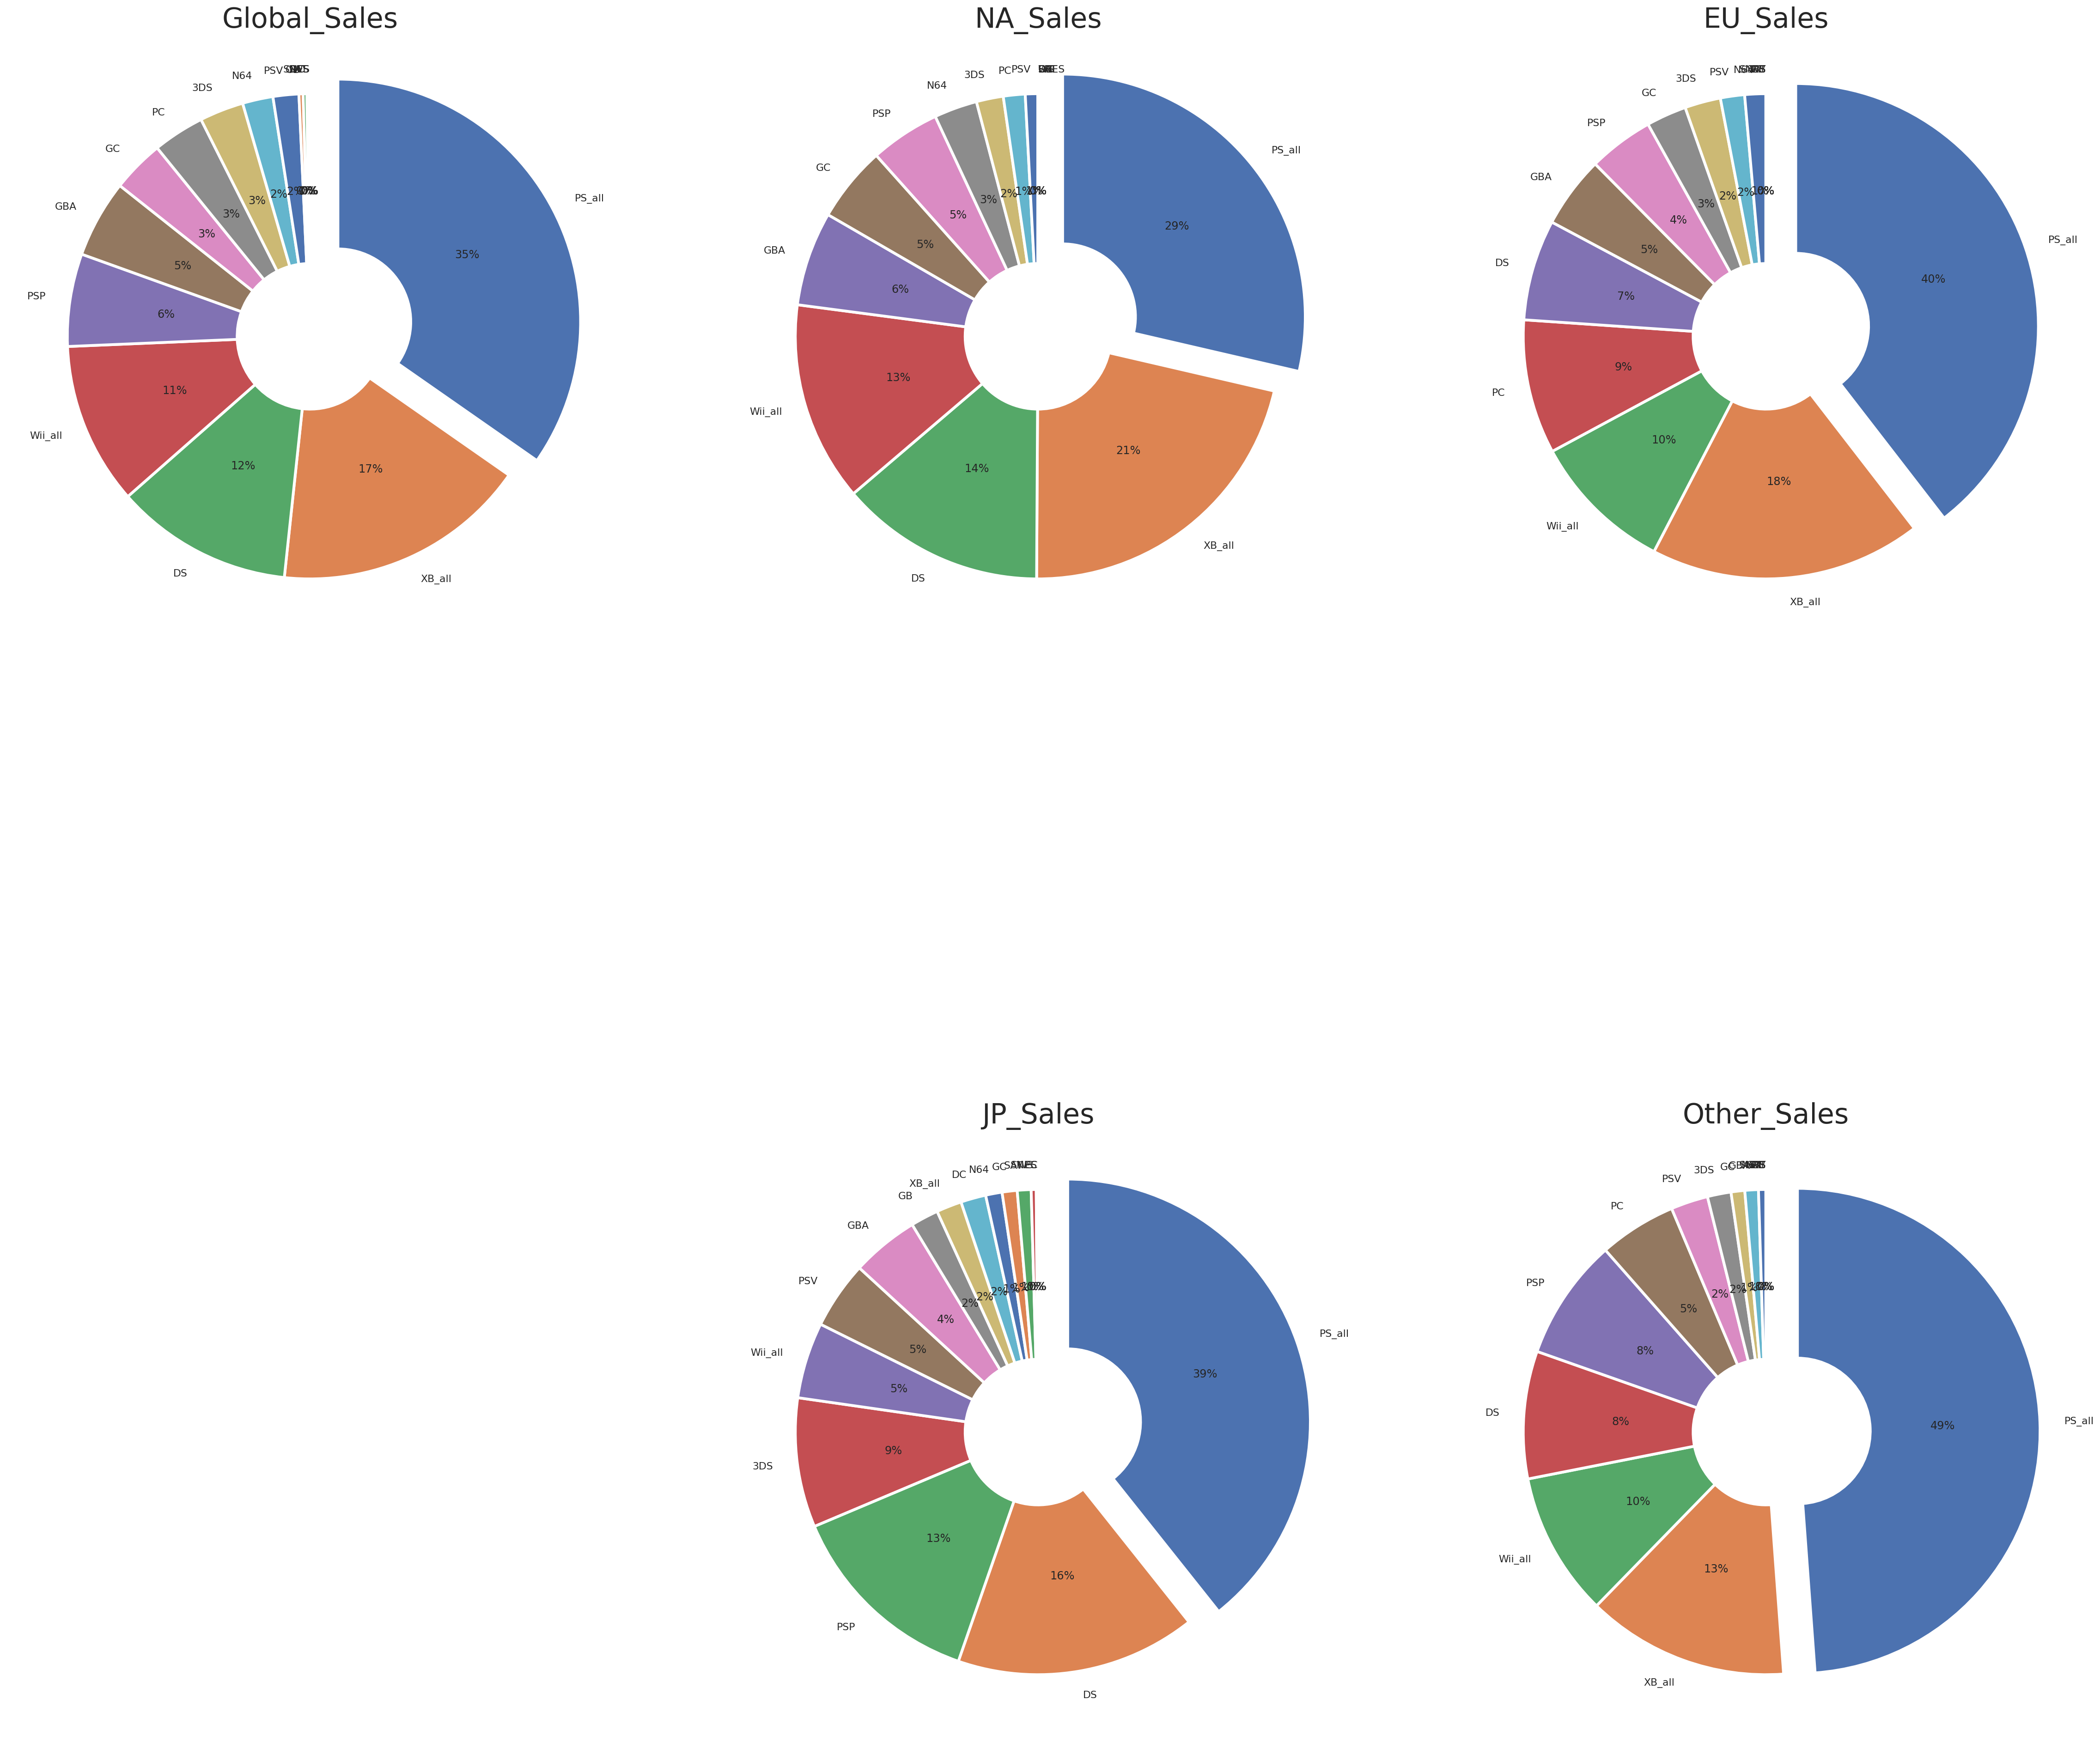

In [164]:
plt.figure(figsize=(40, 40))
plt.subplot(2, 3, 1)
pie_platform('Global_Sales');

plt.subplot(2, 3, 2)
pie_platform('NA_Sales')

plt.subplot(2, 3, 3)
pie_platform('EU_Sales')

plt.subplot(2, 3, 5)
pie_platform('JP_Sales')

plt.subplot(2, 3, 6)
pie_platform('Other_Sales')

In [165]:
asl_high_trend= after_starcraft_high.groupby([after_starcraft_high['Year'], after_starcraft_high['Genre']]).sum()
asl_high_trend = asl_high_trend[['Global_Sales']]
asl_high_trend

Global_Sales
Year Genre                     
1998 Action               30.98
     Adventure             5.55
     Fighting             24.76
     Misc                  7.51
     Platform             22.69
...                         ...
2016 Fighting              1.06
     Platform              1.18
     Role-Playing          1.56
     Shooter              12.92
     Sports                8.73

[205 rows x 1 columns]

In [166]:
year_global_trend_high = pd.DataFrame()
for i in range(30):
  year = 1998 + i
  try:
    tmp = asl_high_trend.loc[year].sort_values(by='Global_Sales', ascending=False).iloc[0]['Global_Sales']
    tmp2 = asl_high_trend[asl_high_trend['Global_Sales']== tmp]
    year_global_trend_high = year_global_trend_high.append(tmp2)
  except:
    pass
year_global_trend_high.reset_index(inplace = True)

In [167]:
year_global_trend_high

Year         Genre  Global_Sales
0   1998        Action         30.98
1   1999  Role-Playing         37.12
2   2000        Action         23.55
3   2001        Action         44.76
4   2002        Action         64.56
5   2003        Action         37.73
6   2004        Action         48.94
7   2005        Action         42.39
8   2006        Sports        105.39
9   2007          Misc         65.50
10  2008        Action         87.91
11  2009        Sports         94.95
12  2010        Action         71.22
13  2011       Shooter         75.91
14  2012        Action         64.57
15  2013        Action         94.80
16  2014        Action         59.71
17  2015       Shooter         59.59
18  2016       Shooter         12.92

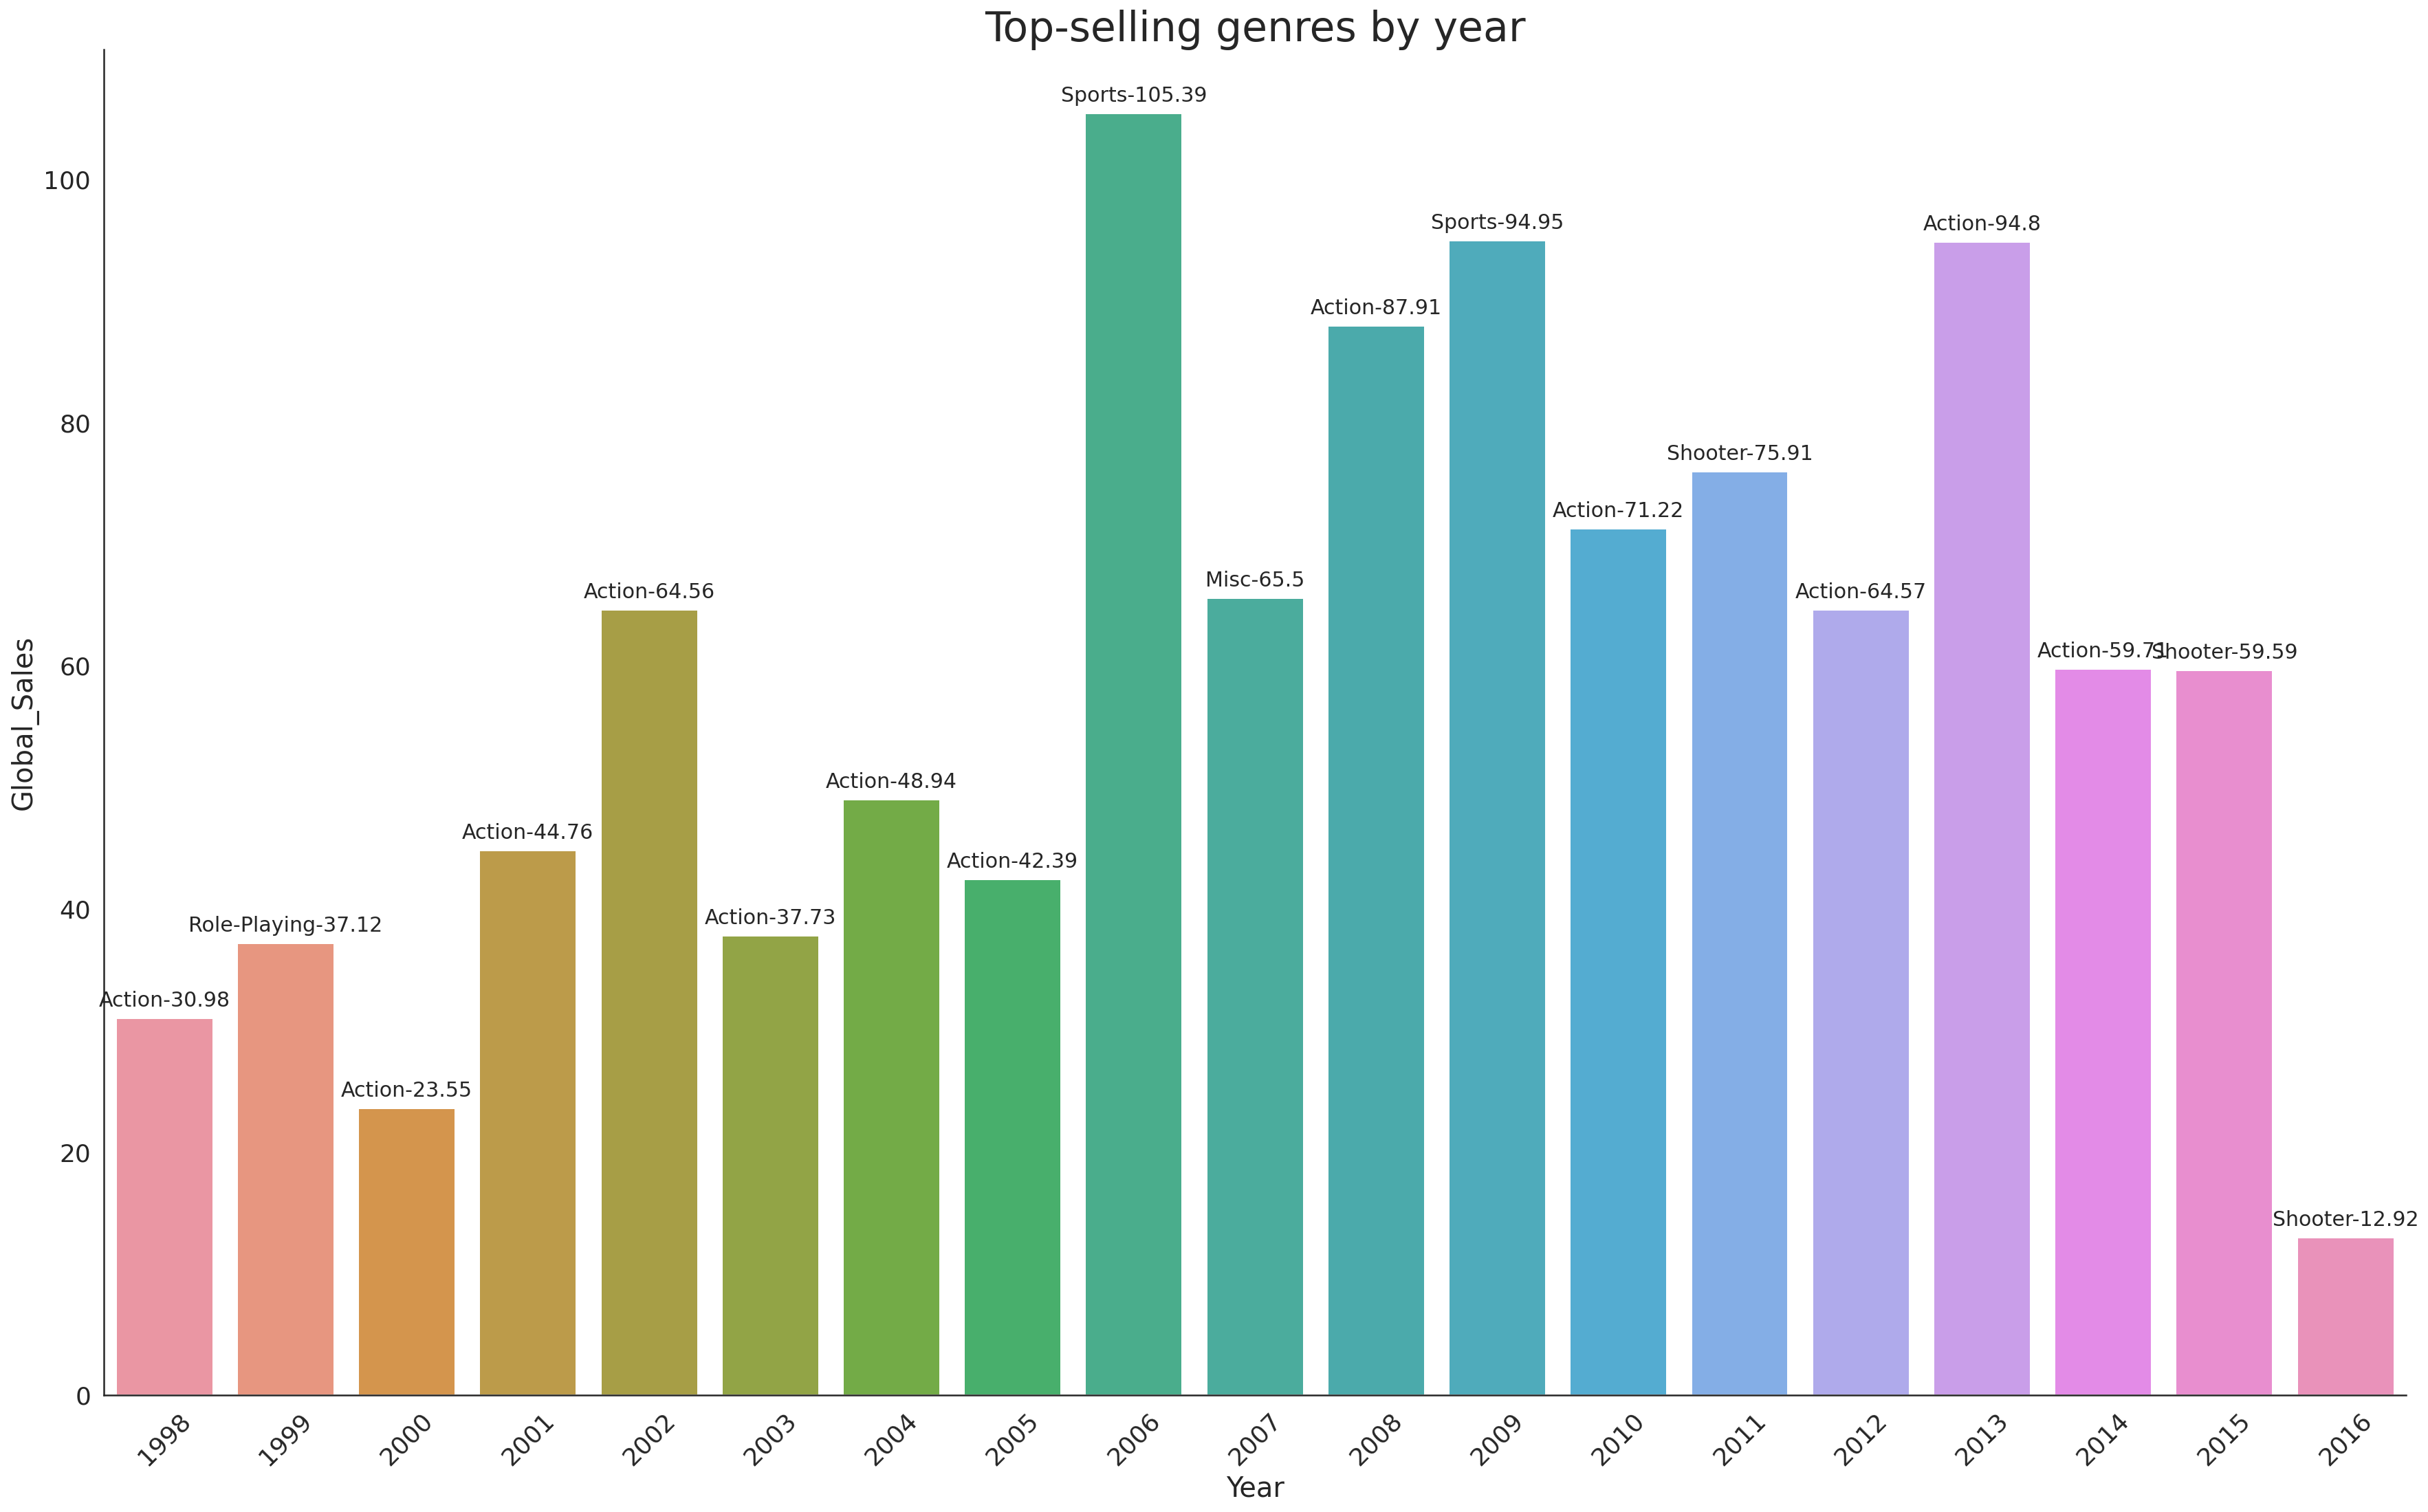

In [171]:
plt.figure(figsize=(30, 18))
plt.title("Top-selling genres by year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Global_Sales_max", fontsize=20 )
plt.xticks(rotation =45 ,fontsize=18) 
plt.yticks(fontsize=18) 
g = sns.barplot(x = 'Year', y='Global_Sales',data = year_global_trend_high)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

genre = year_global_trend_high['Genre']
index = 0
for value in year_global_trend_high['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), size=15, rotation= 0, ha="center")
    index += 1

In [60]:
change_NA_high = []
for i in range(1,21):
  a = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i]['NA_Sales'].sum()
  b = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i+1]['NA_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_NA_high.append(rate_of_change)

change_EU_high = []
for i in range(1,21):
  a = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i]['EU_Sales'].sum()
  b = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i+1]['EU_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_EU_high.append(rate_of_change)

change_JP_high = []
for i in range(1,21):
  a = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i]['JP_Sales'].sum()
  b = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i+1]['JP_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_JP_high.append(rate_of_change)

change_GL_high = []
for i in range(1,21):
  a = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i]['Global_Sales'].sum()
  b = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i+1]['Global_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_GL_high.append(rate_of_change)

change_OT_high = []
for i in range(1,21):
  a = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i]['Other_Sales'].sum()
  b = after_starcraft_high[after_starcraft_high['Year'] == 2000 + i+1]['Other_Sales'].sum()
  rate_of_change = round((b-a)/a,3)
  change_OT_high.append(rate_of_change)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


In [61]:
change_NA_high

[0.052,
 -0.188,
 0.175,
 -0.005,
 0.377,
 0.079,
 0.087,
 -0.07,
 0.008,
 -0.184,
 -0.328,
 0.097,
 -0.169,
 -0.248,
 -0.861,
 -1.0,
 nan,
 nan,
 nan,
 nan]

In [62]:
df_change_high = pd.DataFrame({'NA' : change_NA_high,
              'EU': change_EU_high,
              'JP': change_JP_high,
              'Other': change_OT_high,
              'Global': change_GL_high})
df_change_high = df_change_high.iloc[:15, :]
index_list = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
df_change_high.index = index_list
df_change_high

NA     EU     JP  Other  Global
2001  0.052  0.055 -0.133  0.180   0.042
2002 -0.188 -0.125 -0.154 -0.137  -0.163
2003  0.175  0.065  0.530  1.304   0.265
2004 -0.005  0.291  0.277 -0.263   0.064
2005  0.377  0.243  0.129  0.425   0.307
2006  0.079  0.170 -0.286  0.372   0.097
2007  0.087 -0.036  0.044 -0.055   0.025
2008 -0.070 -0.007  0.247 -0.184  -0.042
2009  0.008 -0.037 -0.299 -0.106  -0.049
2010 -0.184 -0.049 -0.298 -0.055  -0.136
2011 -0.328 -0.290  0.223 -0.285  -0.278
2012  0.097  0.157 -0.065  0.129   0.105
2013 -0.169 -0.034  0.046 -0.002  -0.084
2014 -0.248 -0.247 -0.379 -0.291  -0.266
2015 -0.861 -0.777 -0.825 -0.786  -0.817

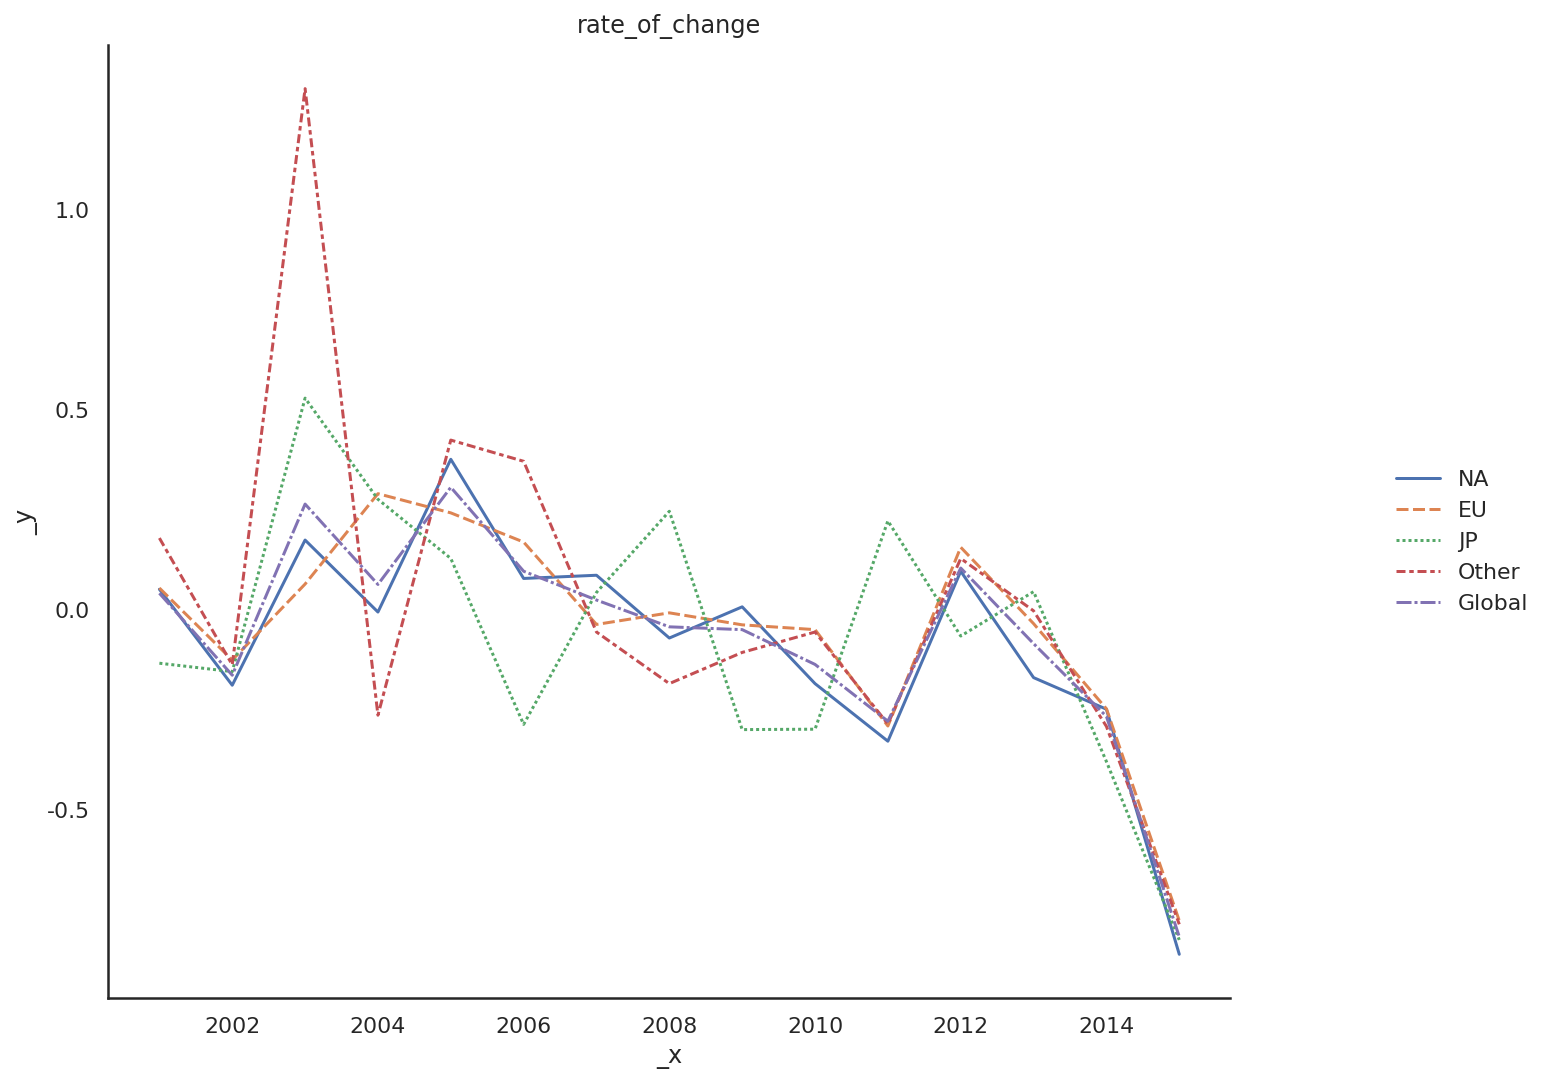

In [172]:
sns.set_style("white")
fig = sns.relplot(kind = 'line',ci = None,data =df_change_high);
fig.fig.set_size_inches(12,8)


fig.set(title = "rate_of_change");